In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
def gaussian(x):
    u = np.exp(-100 * (x - 0.25)**2)
    return u


def step(x):
    u = np.zeros(x.shape)
    for j in range(len(x)):
        if (x[j] >= 0.6) and (x[j] <= 0.8):
            u[j] = 1.0

    return u


def c(x):
    #return 1.0 + 0.0 * x
    return 2.0 + np.sin(2 * np.pi * x)

T = 1.0
gamma = 0.95
nx = 128

In [12]:
x, hx = np.linspace(0, 1, nx, endpoint=False, retstep=True)
xx = np.linspace(0, 1-hx, 1000)

ht = hx * gamma / c(x).max()
nt = int(np.ceil(T/ht))
ht = T/nt

print('T = %g' % T)
print('tsteps = %d' % nt)
print('    hx = %g' % hx)
print('    ht = %g' % ht)
print('lambda = %g' % gamma)

J = np.arange(0, nx)  # all vertices
Jm1 = np.roll(J, 1)
Jp1 = np.roll(J, -1)

T = 1
tsteps = 405
    hx = 0.0078125
    ht = 0.00246914
lambda = 0.95


/var/folders/6n/rm73m6jj42b58slwfg0zs84c0000gn/T/ipykernel_83881/3947026693.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


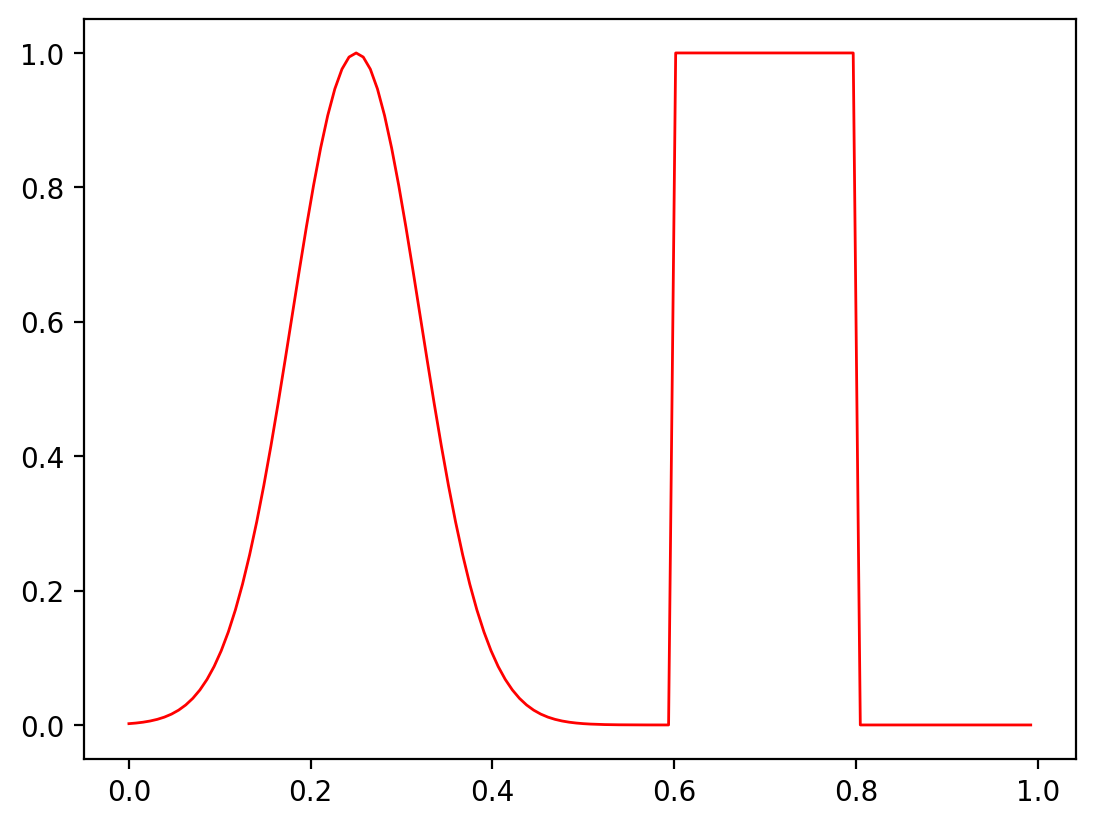

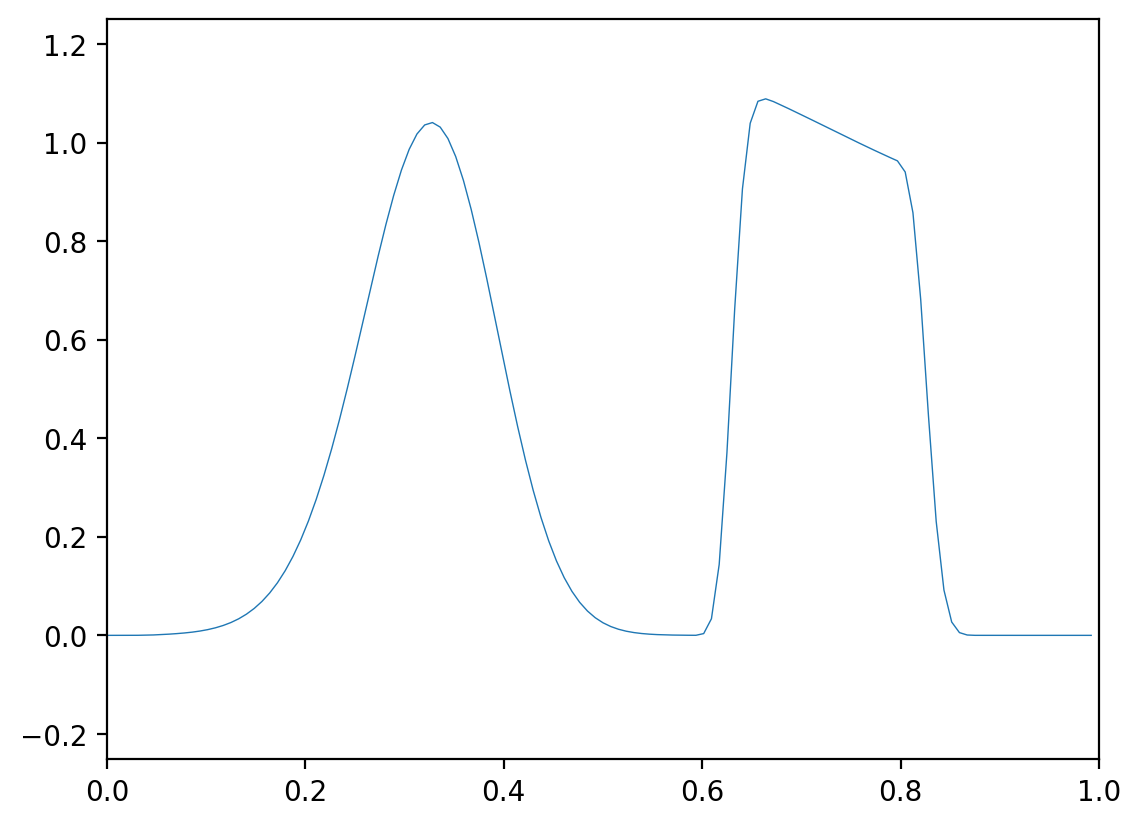

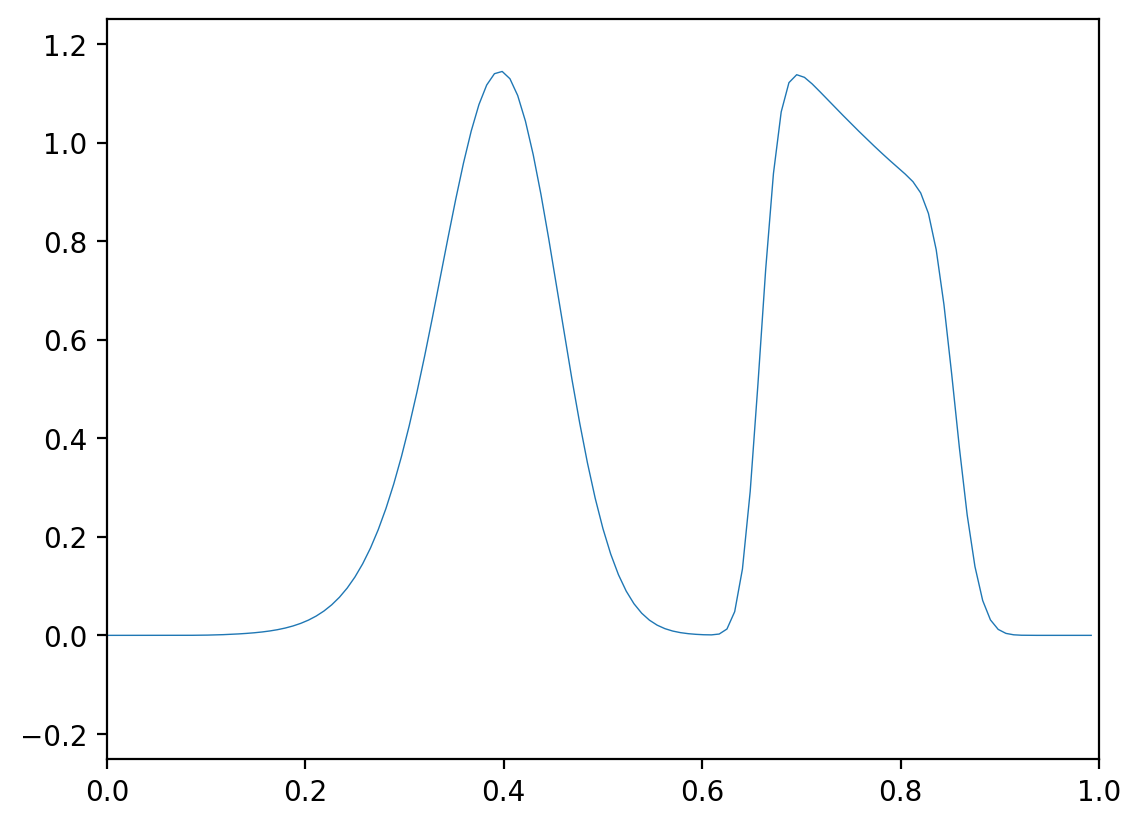

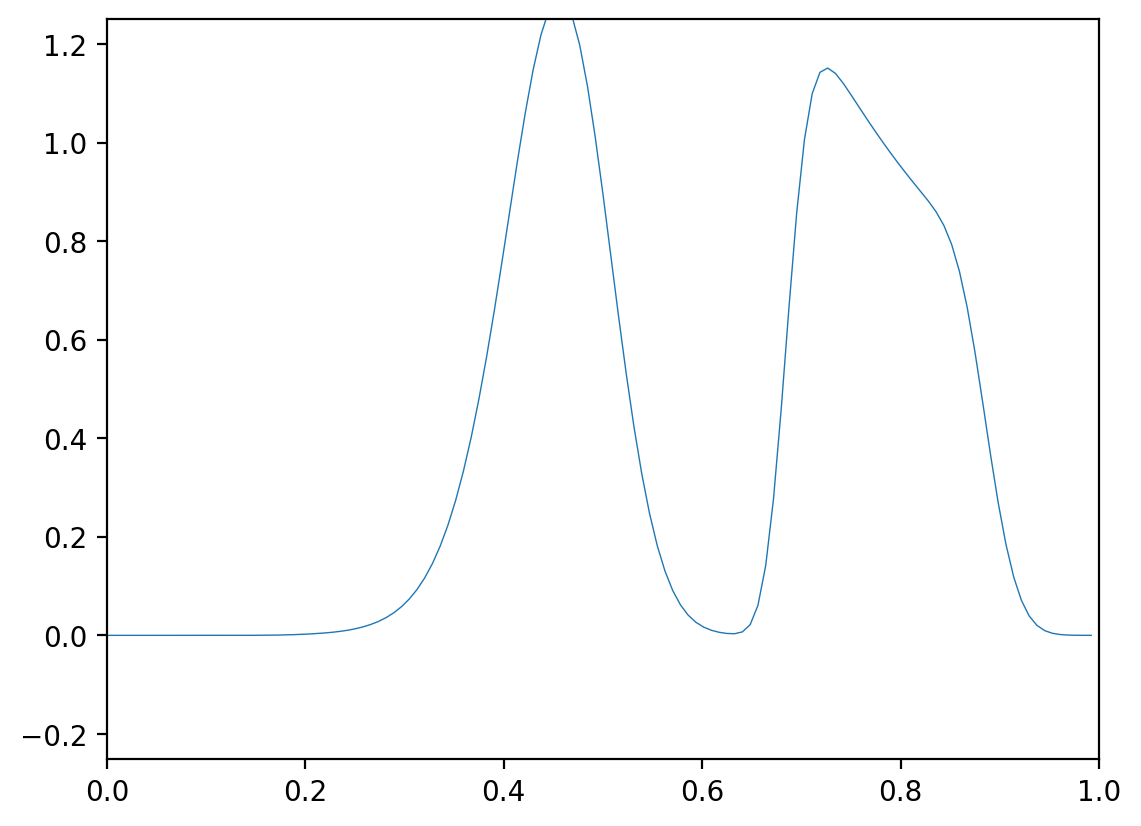

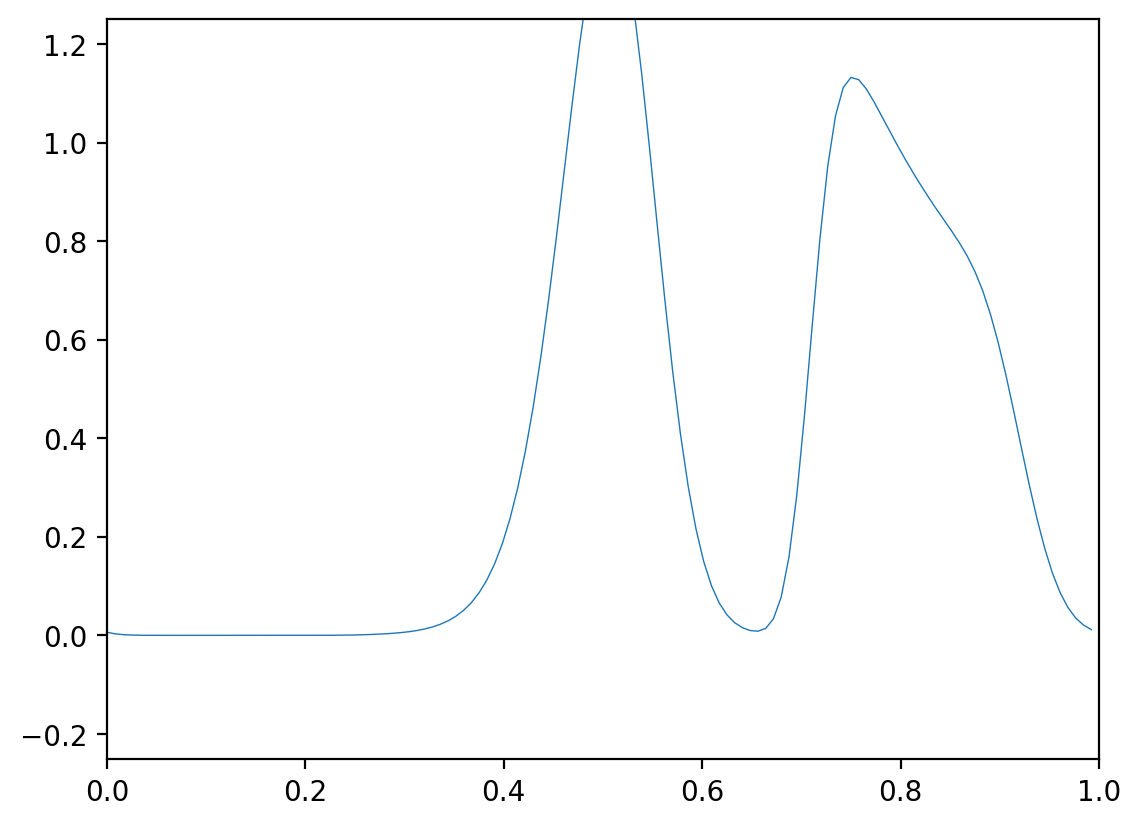

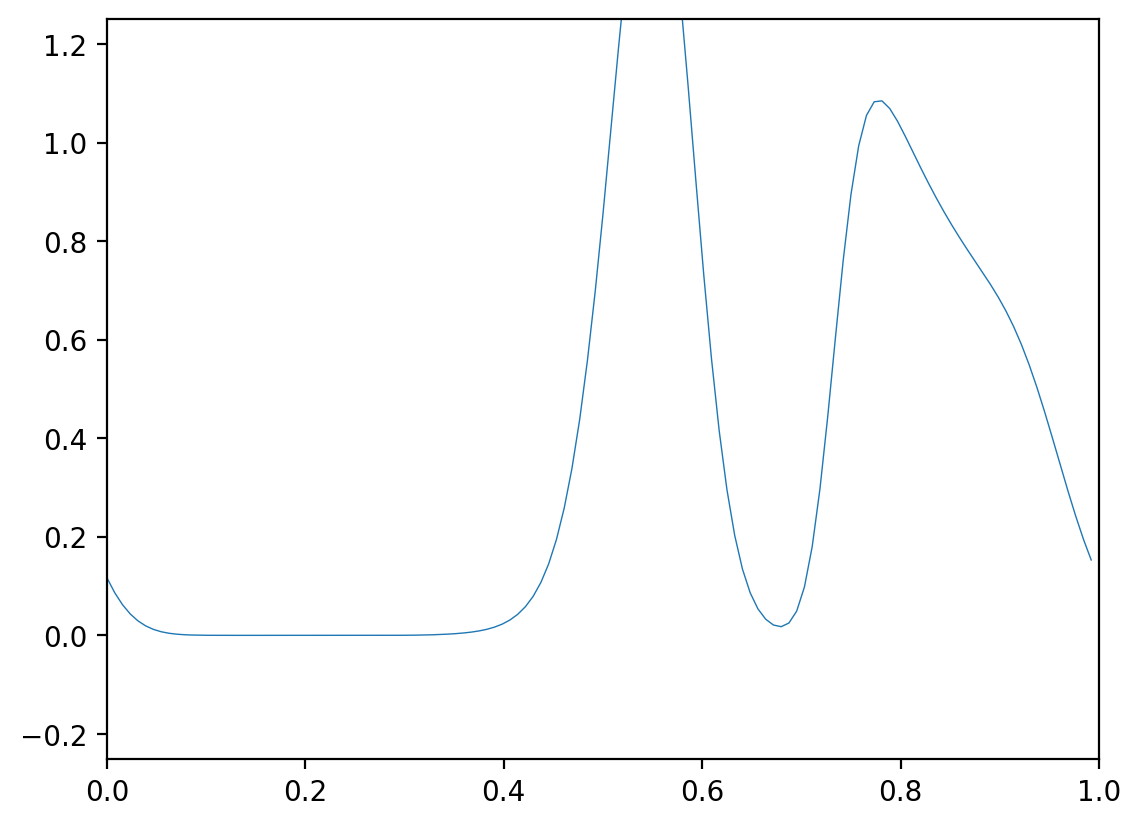

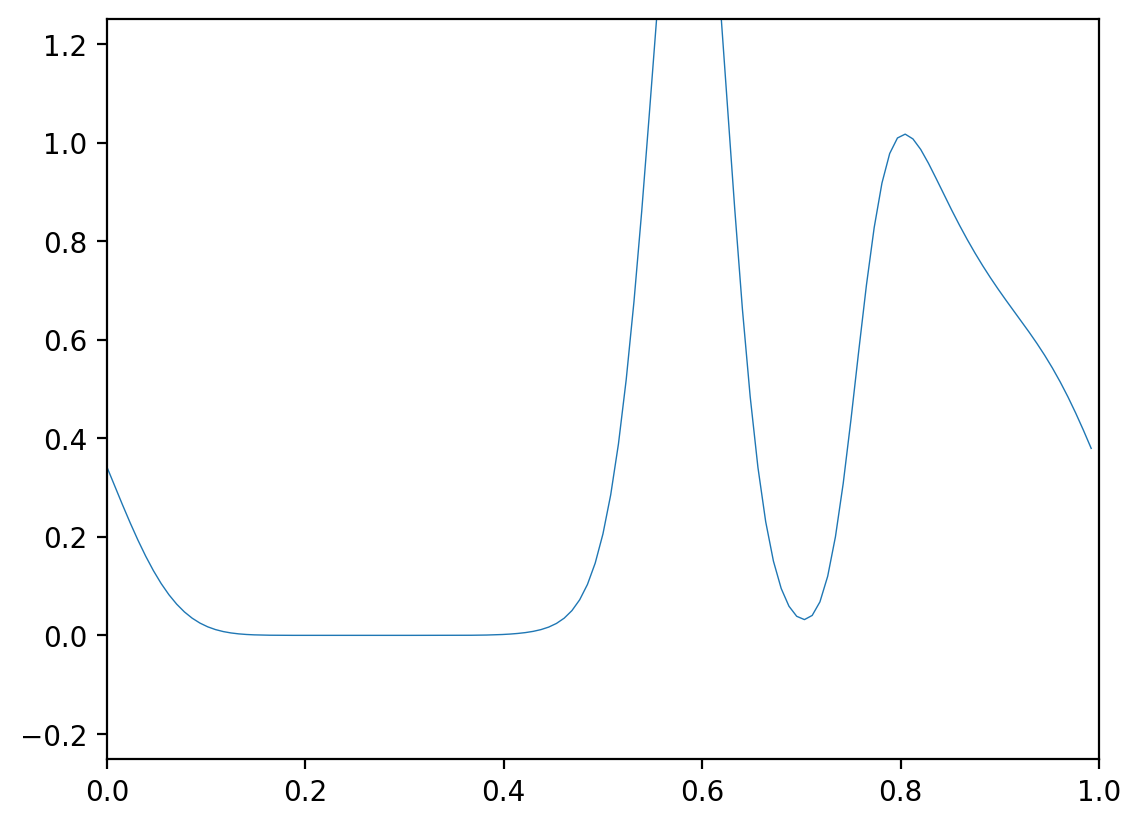

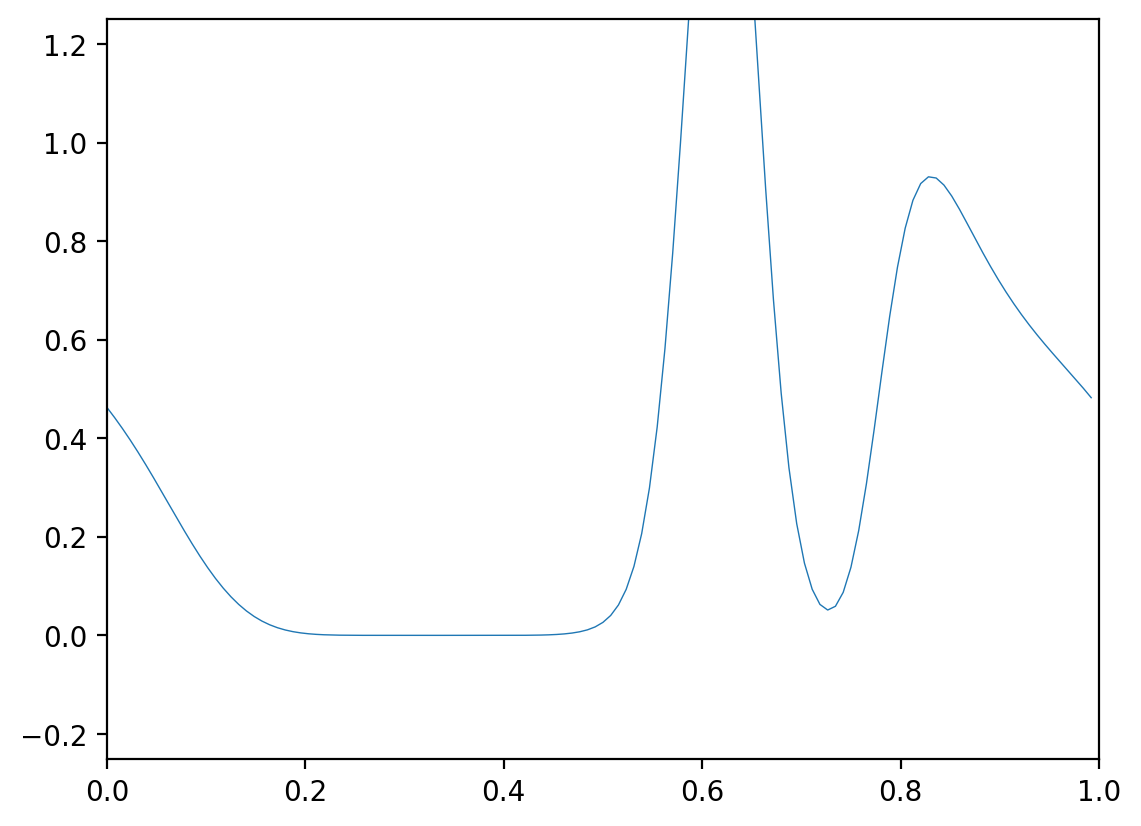

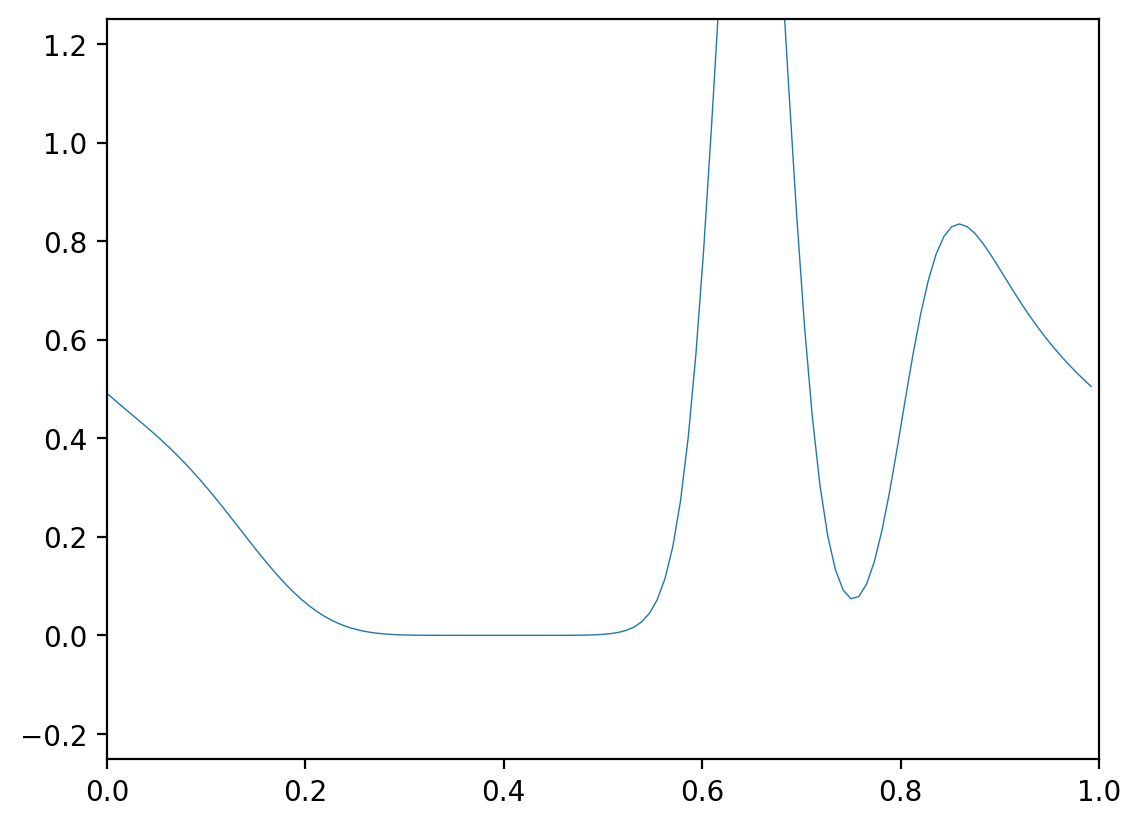

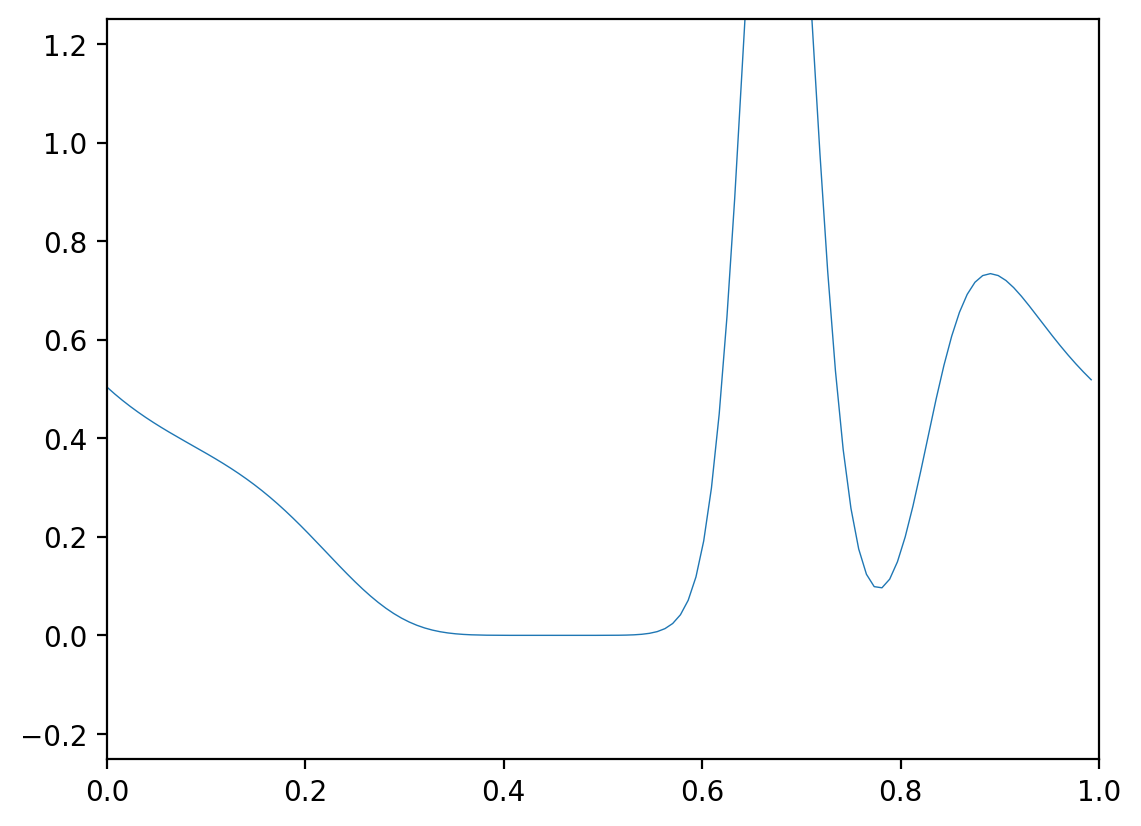

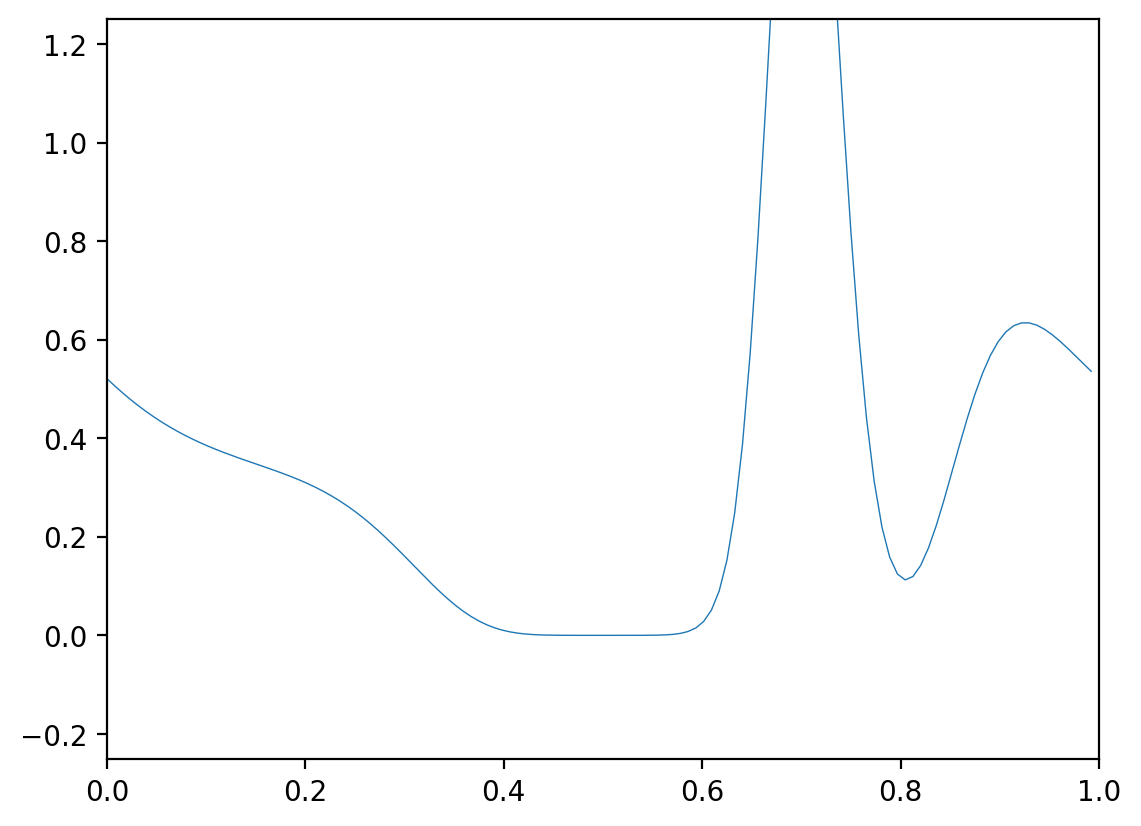

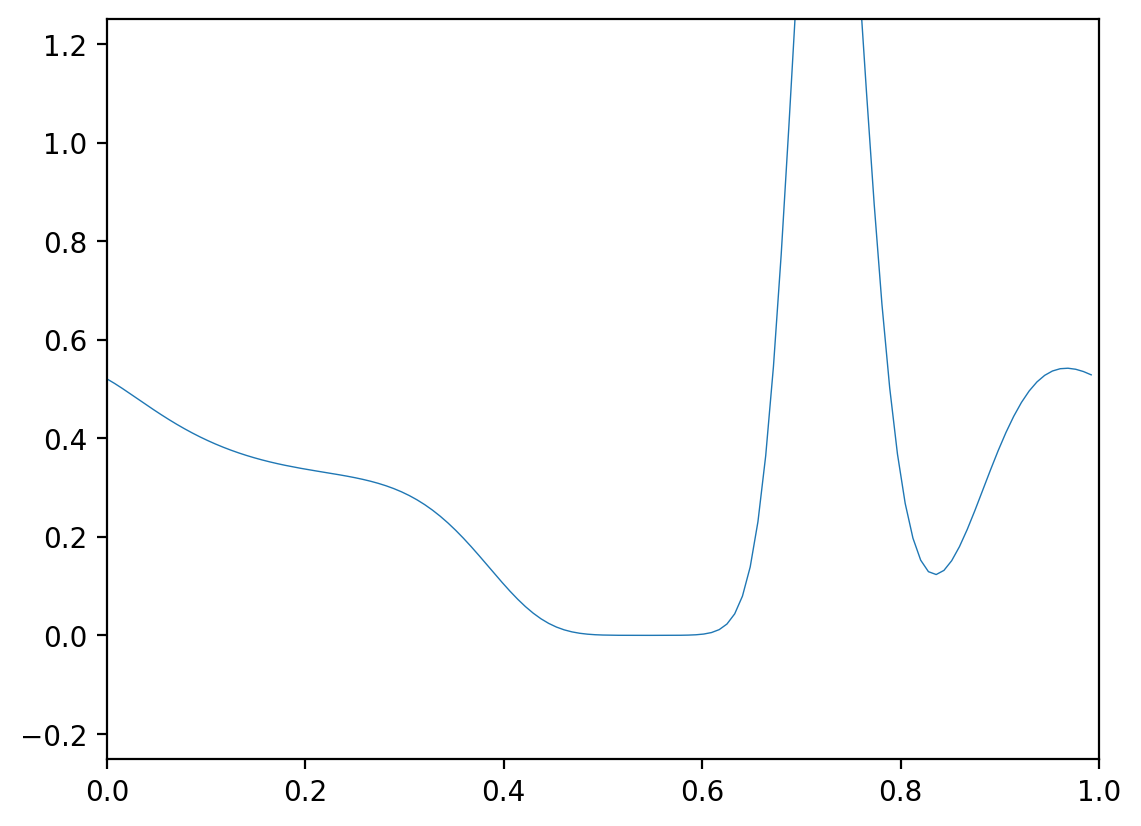

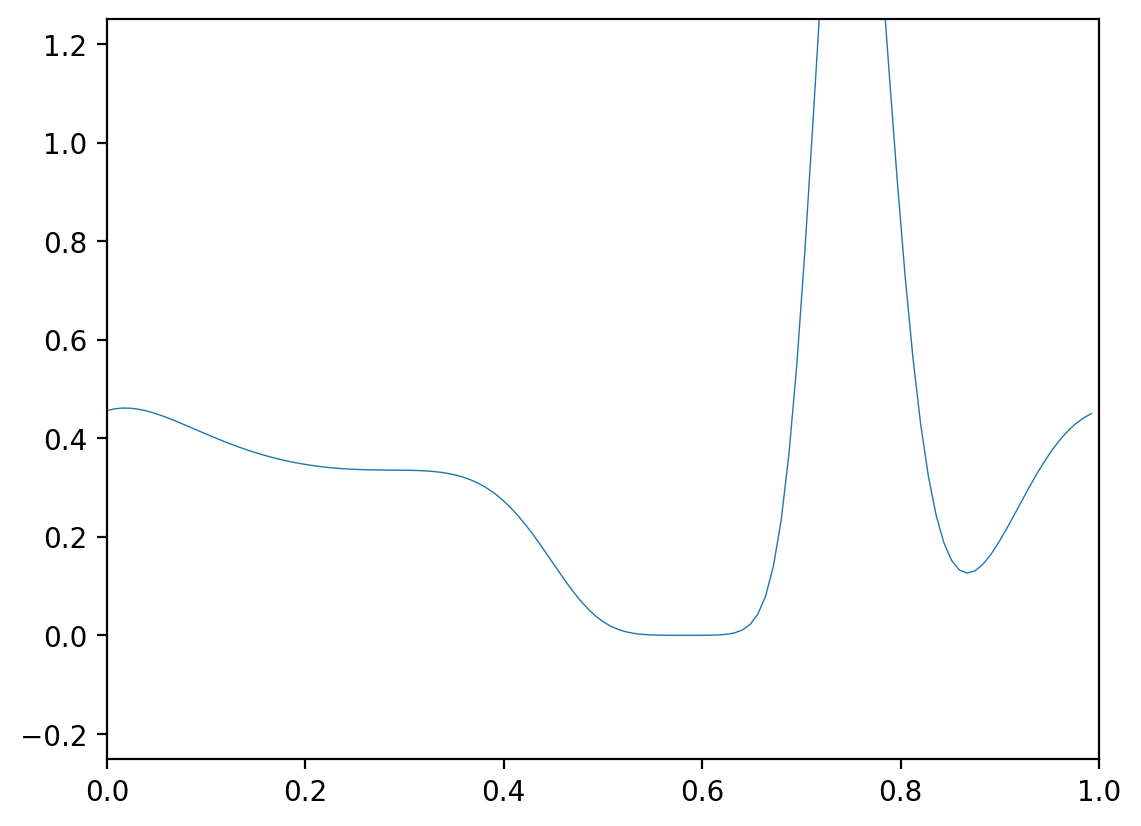

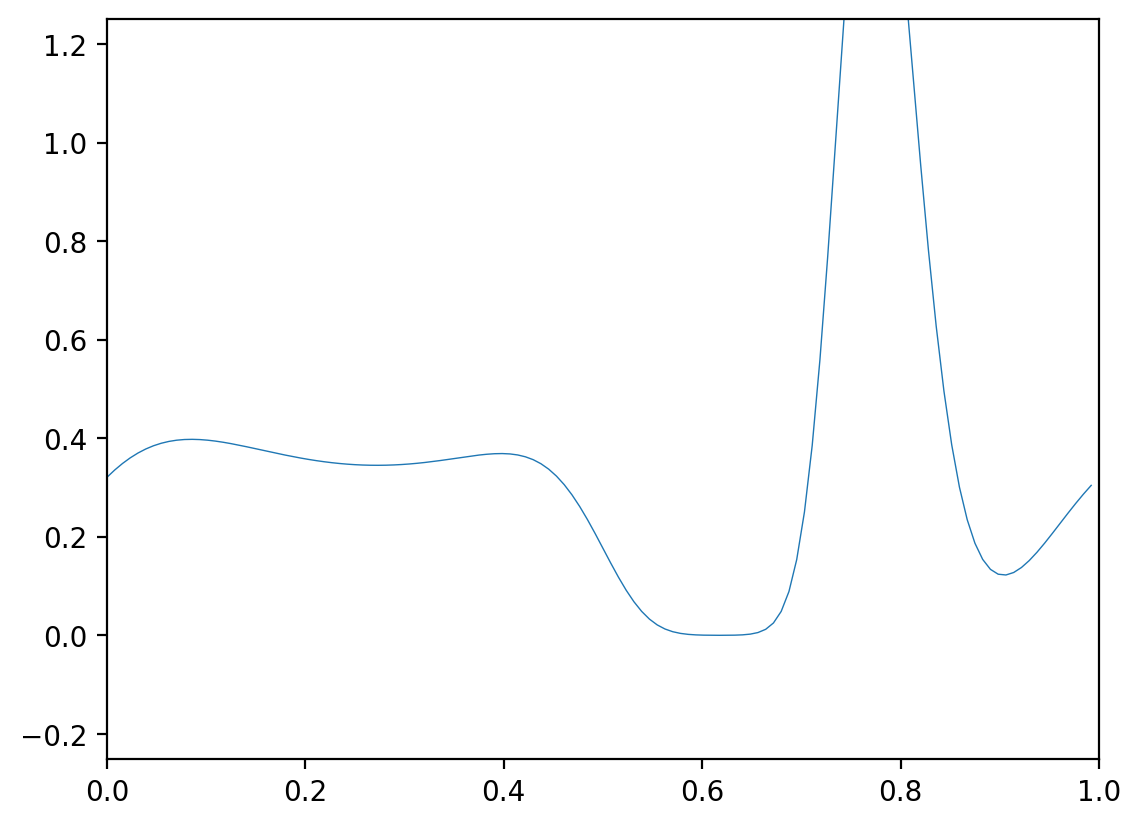

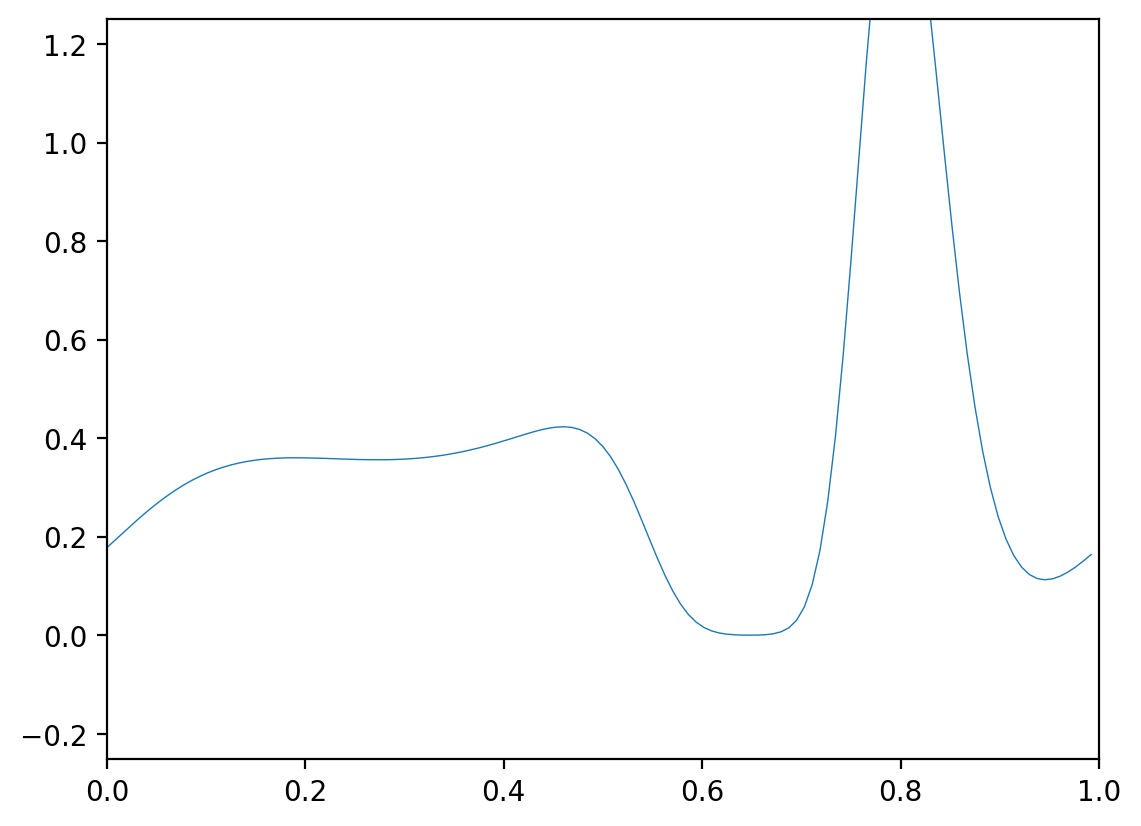

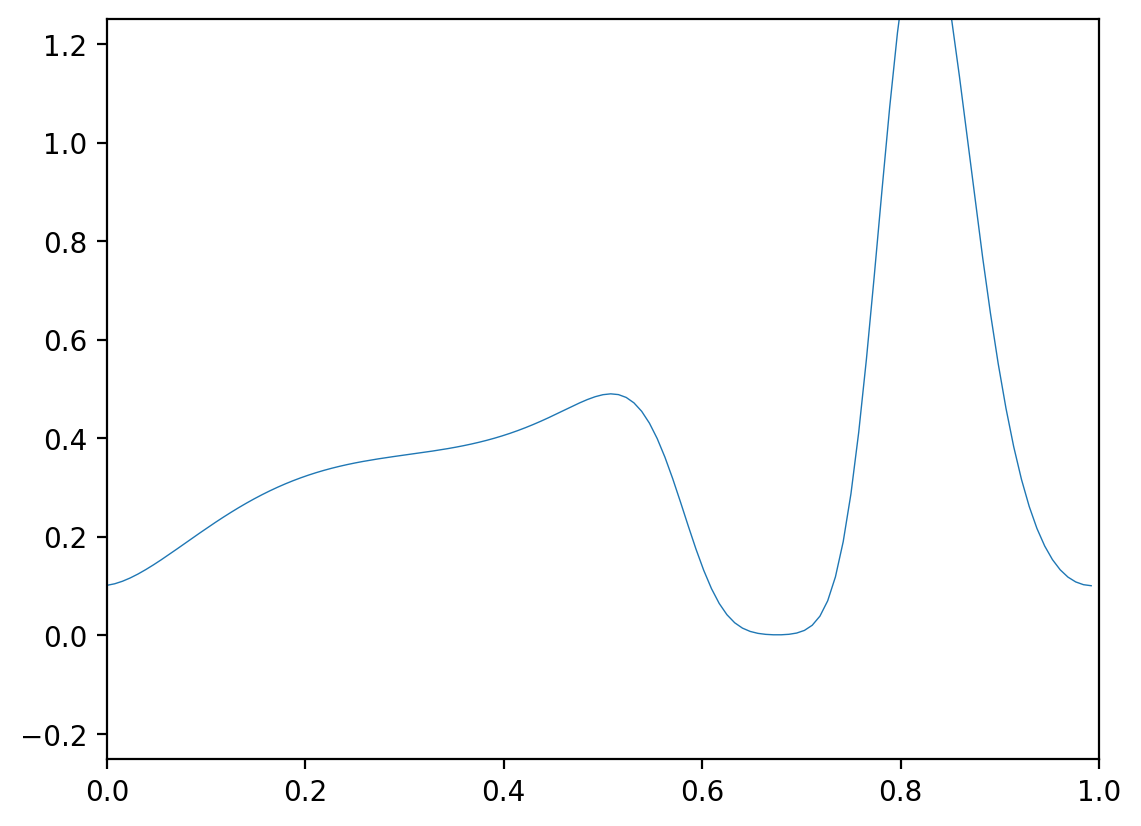

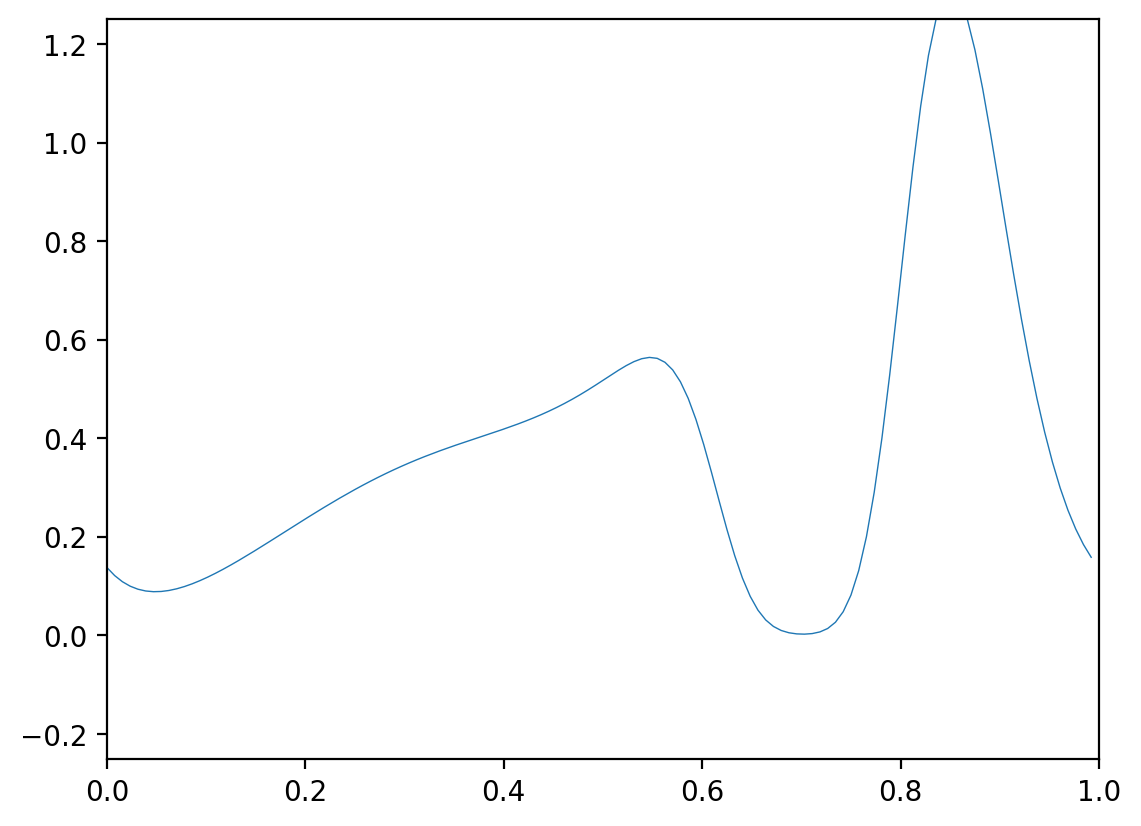

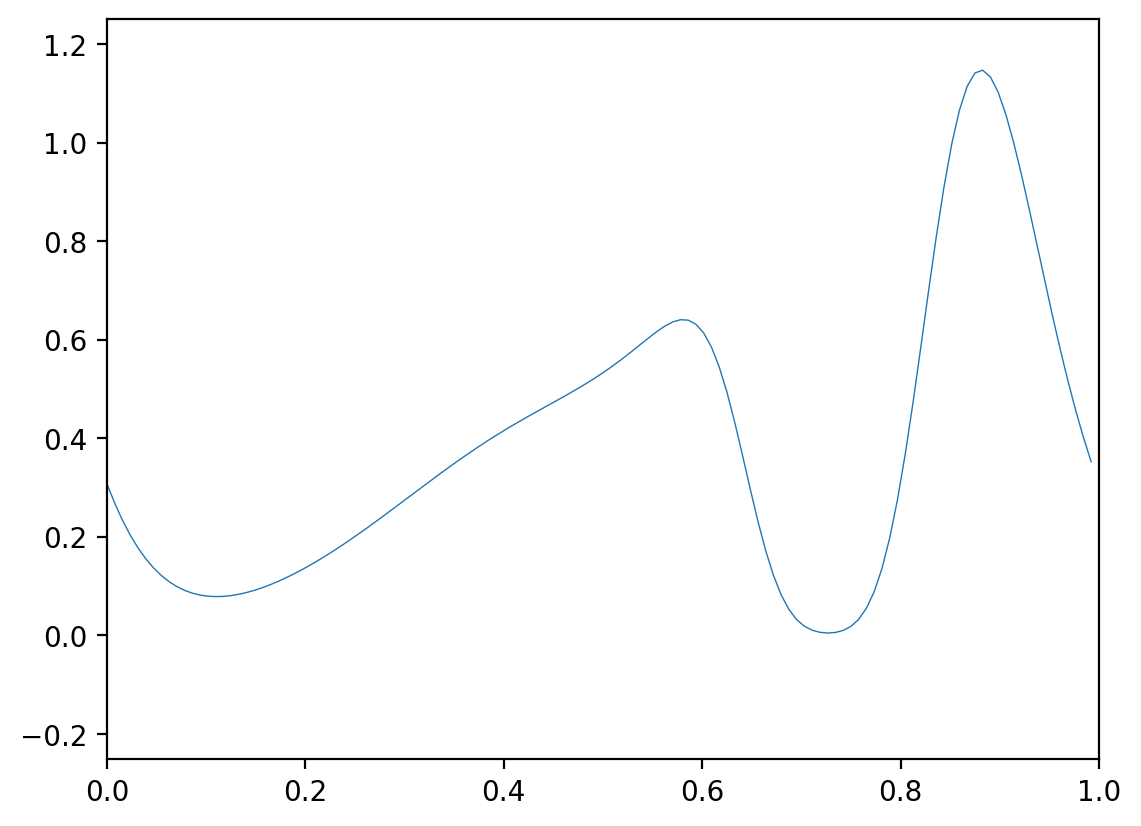

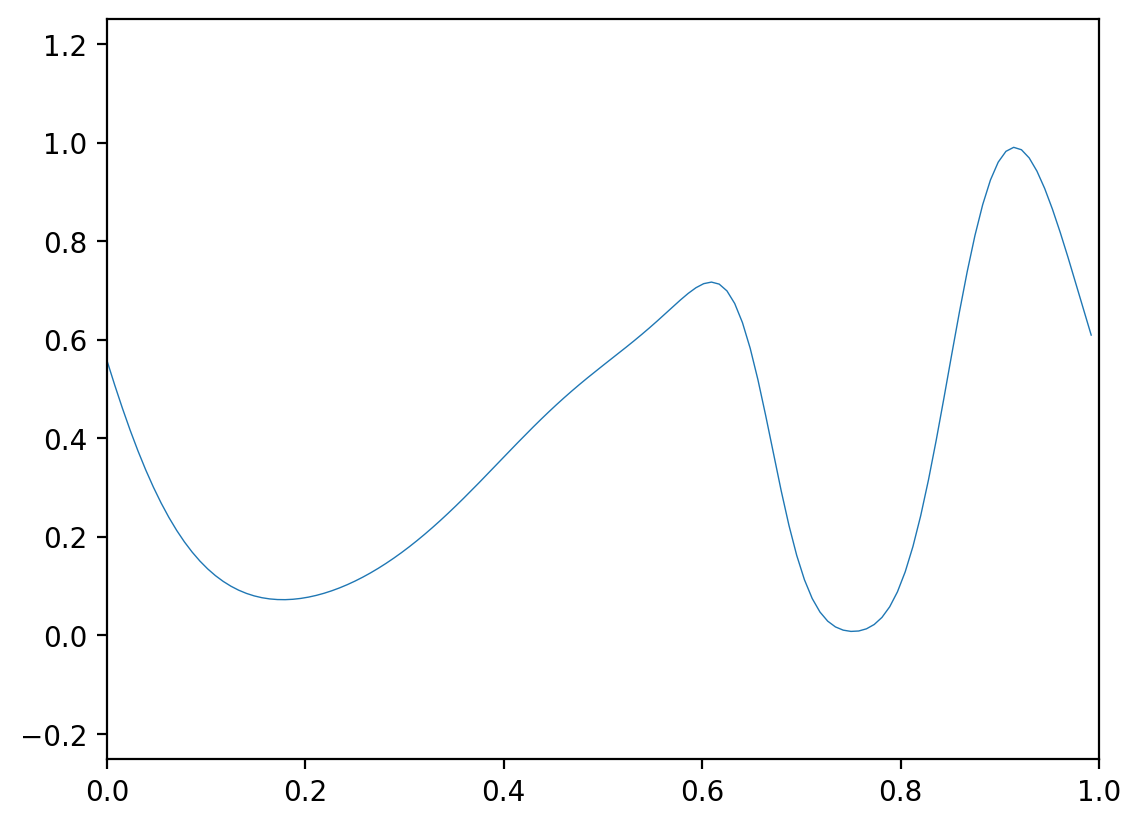

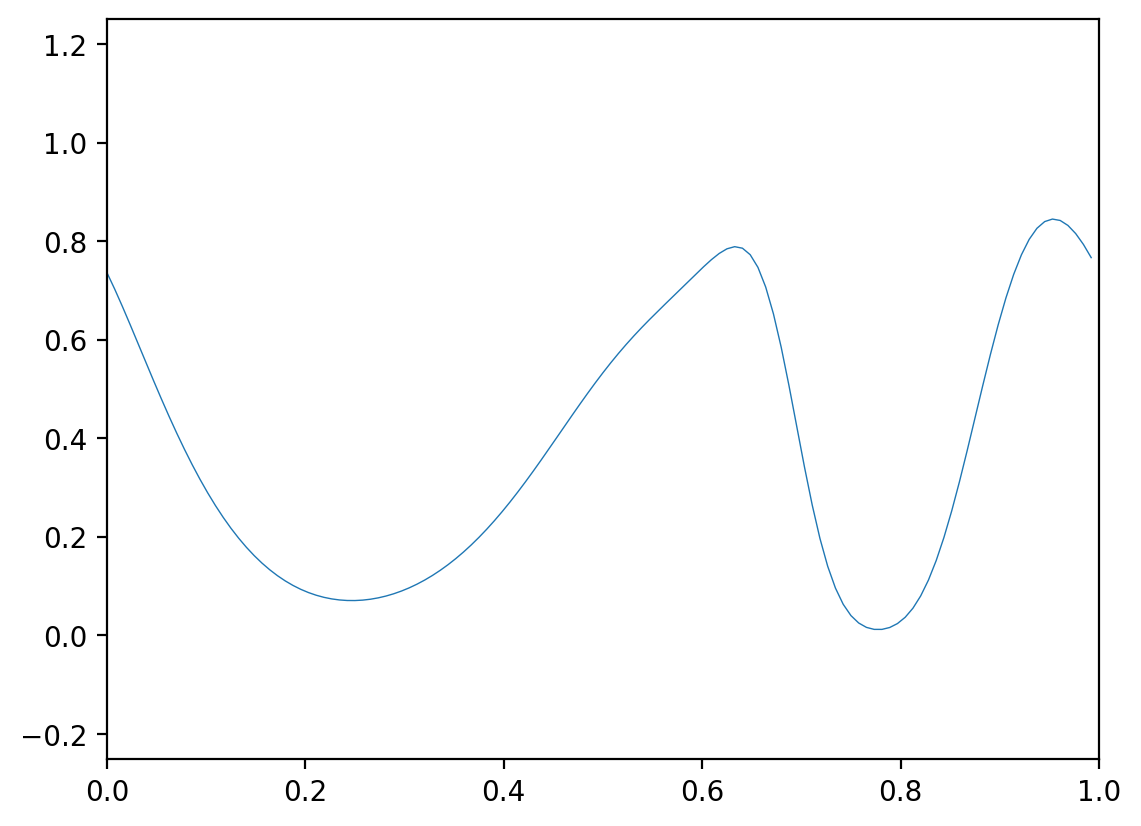

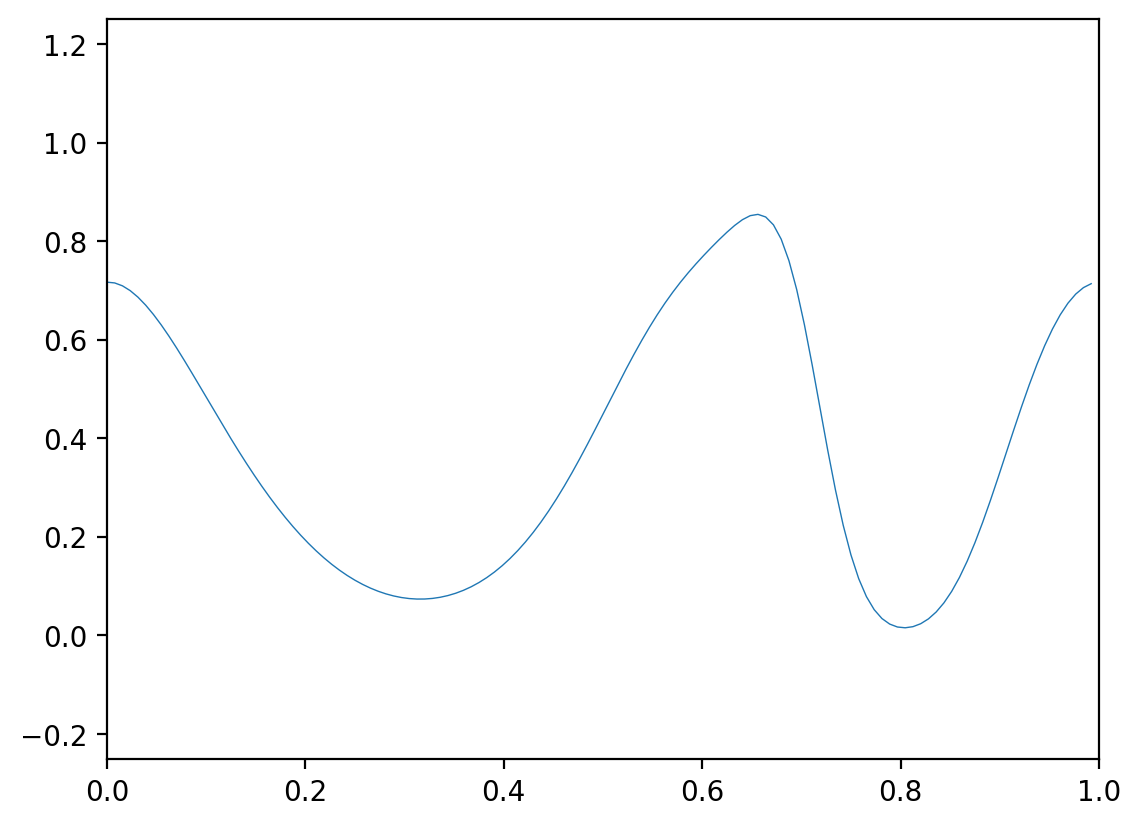

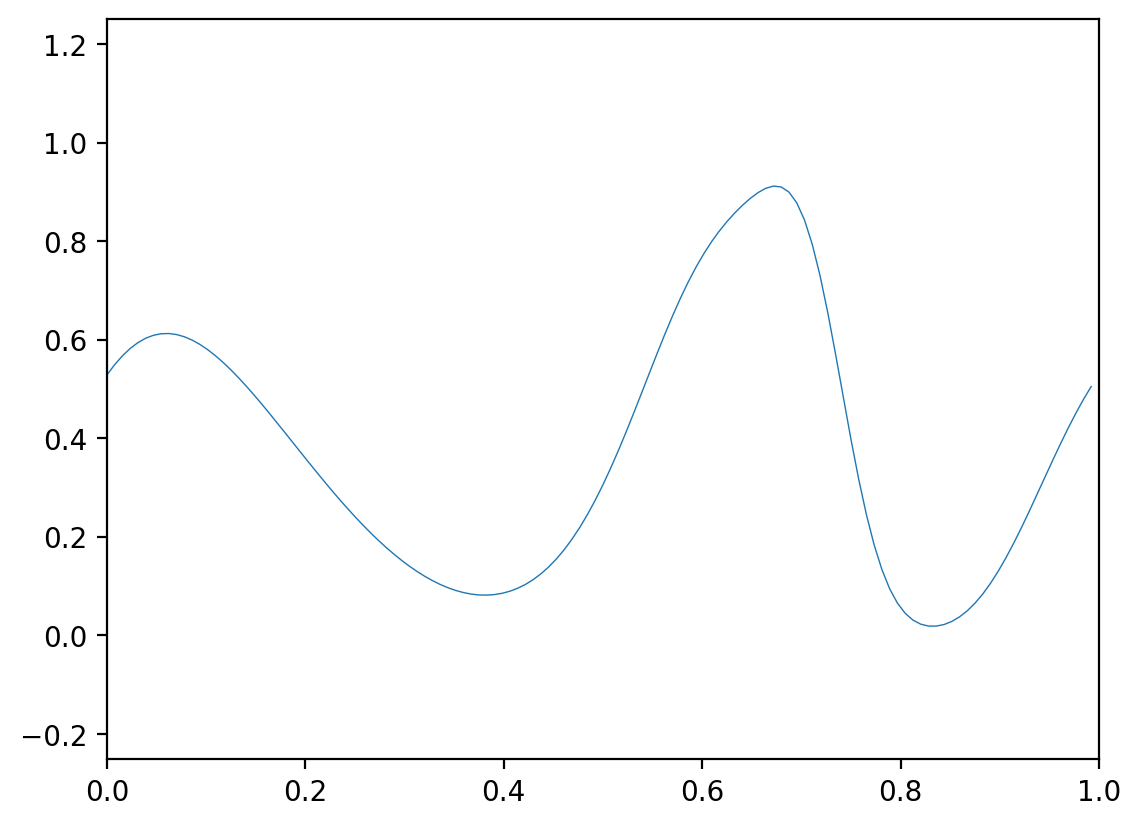

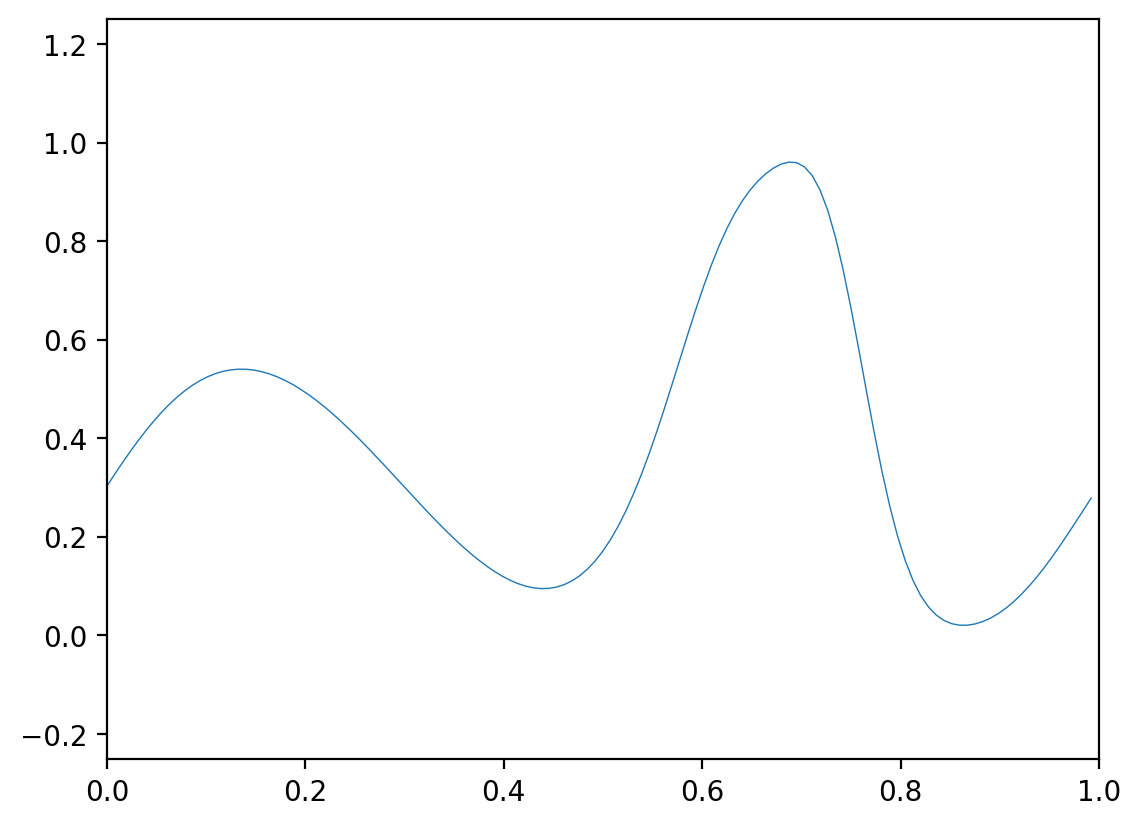

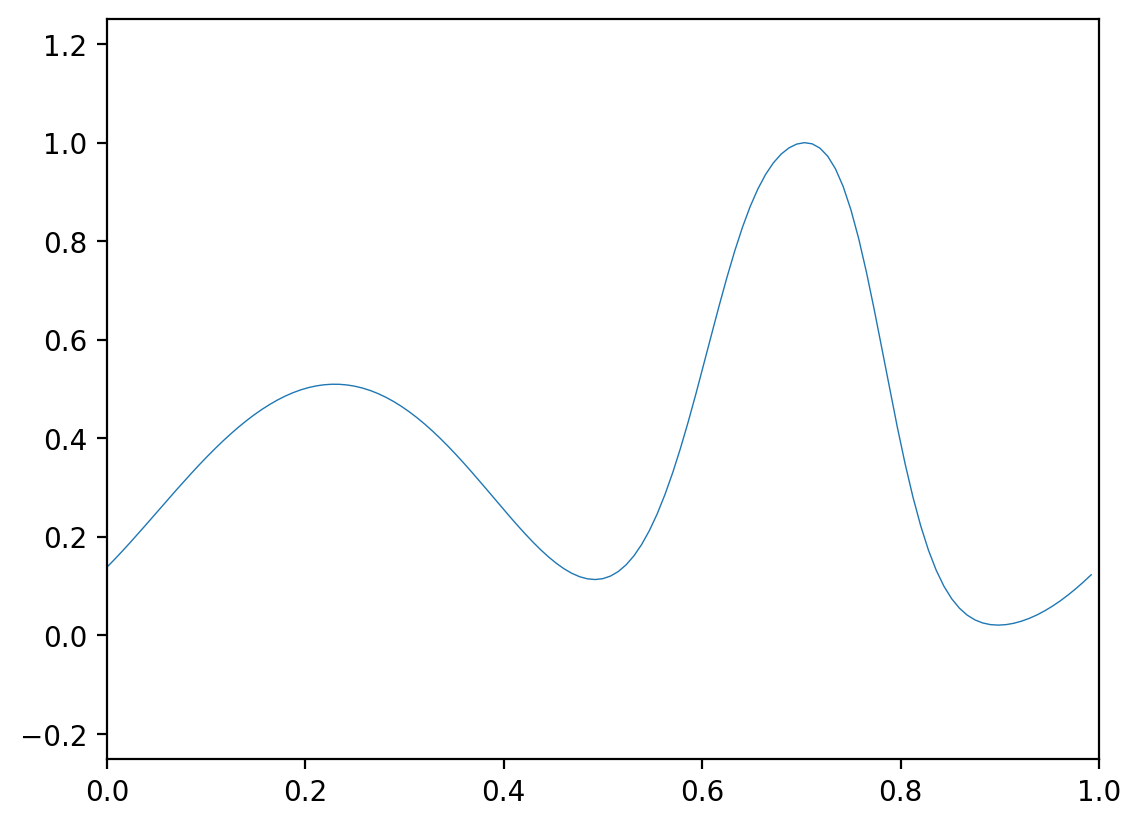

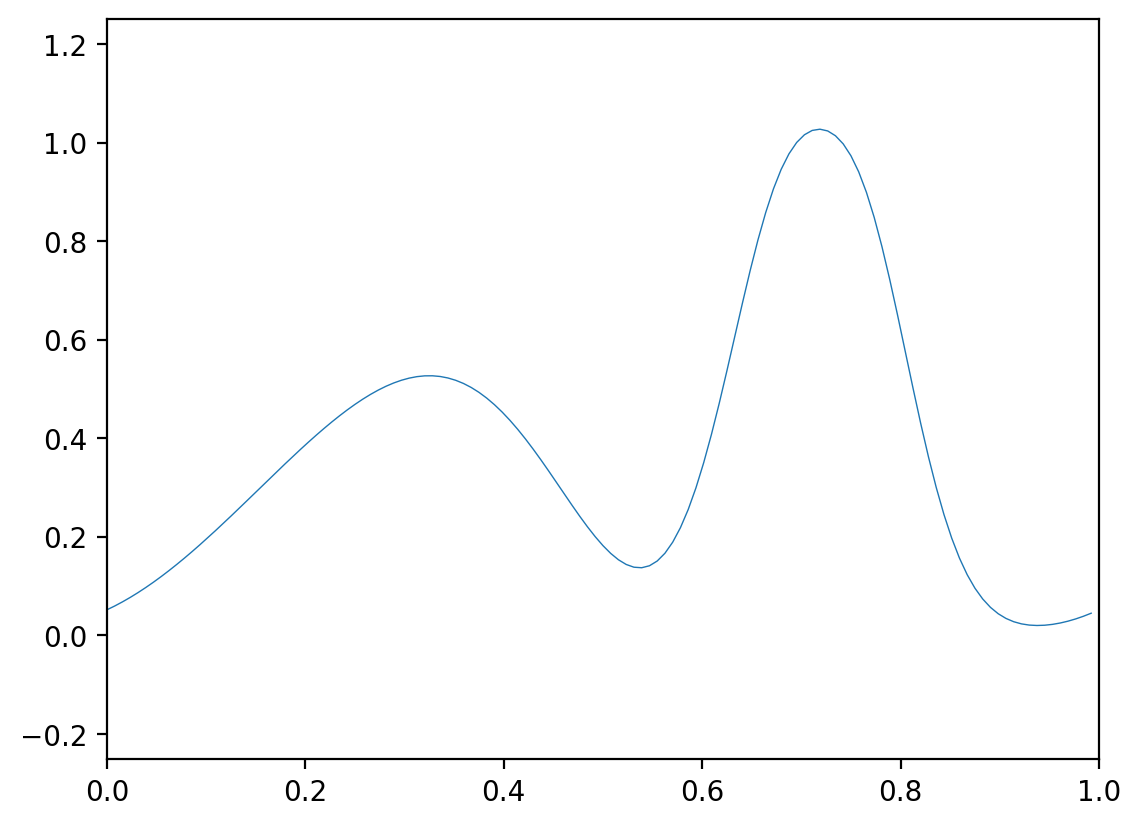

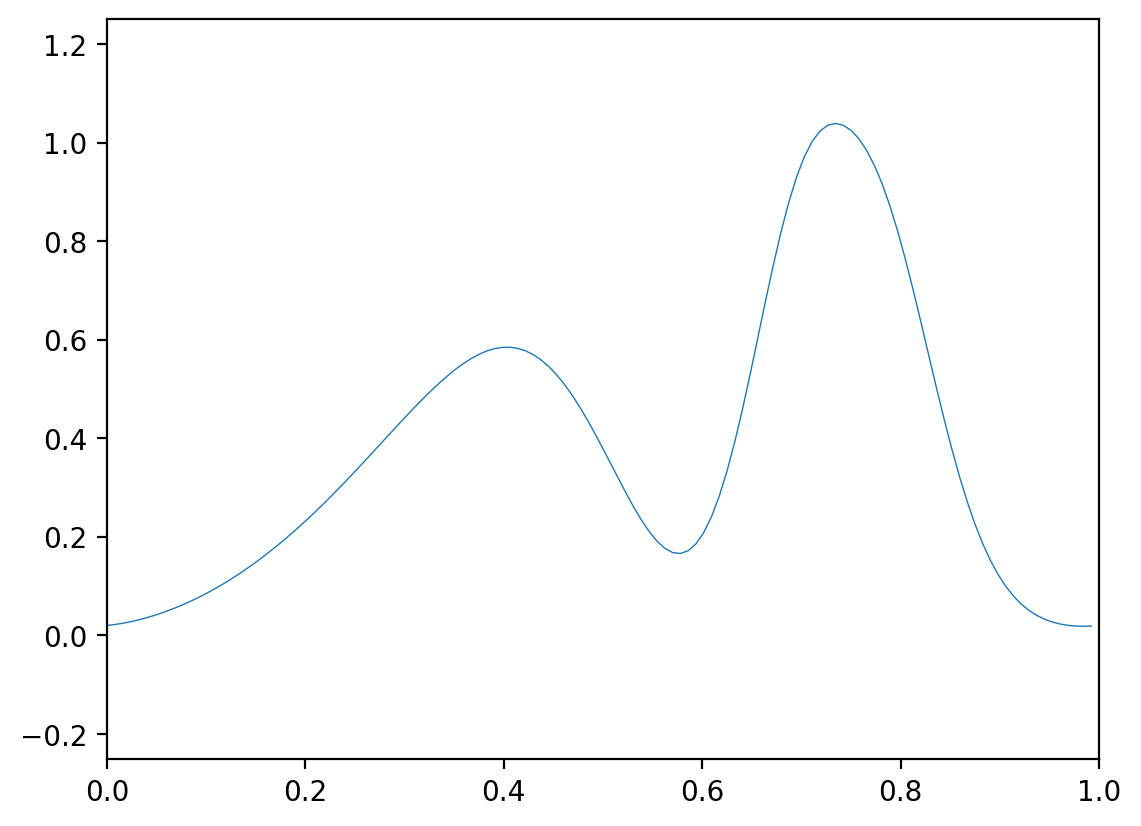

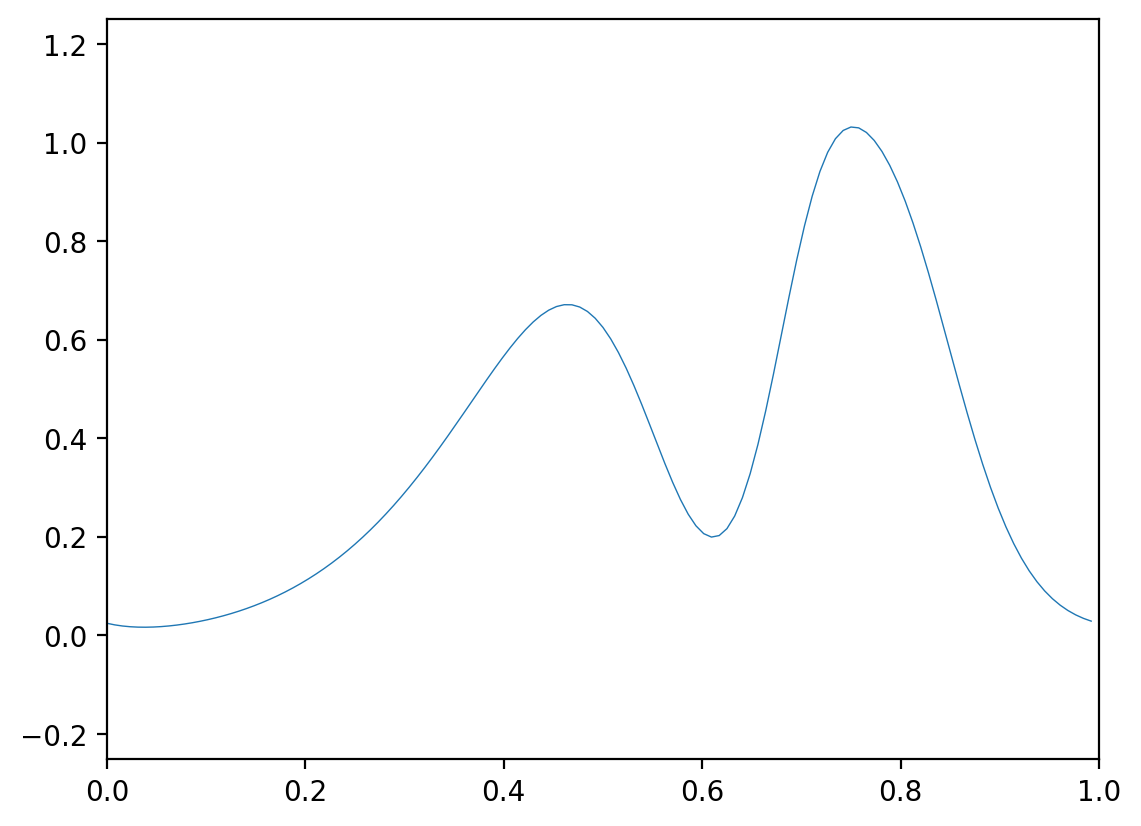

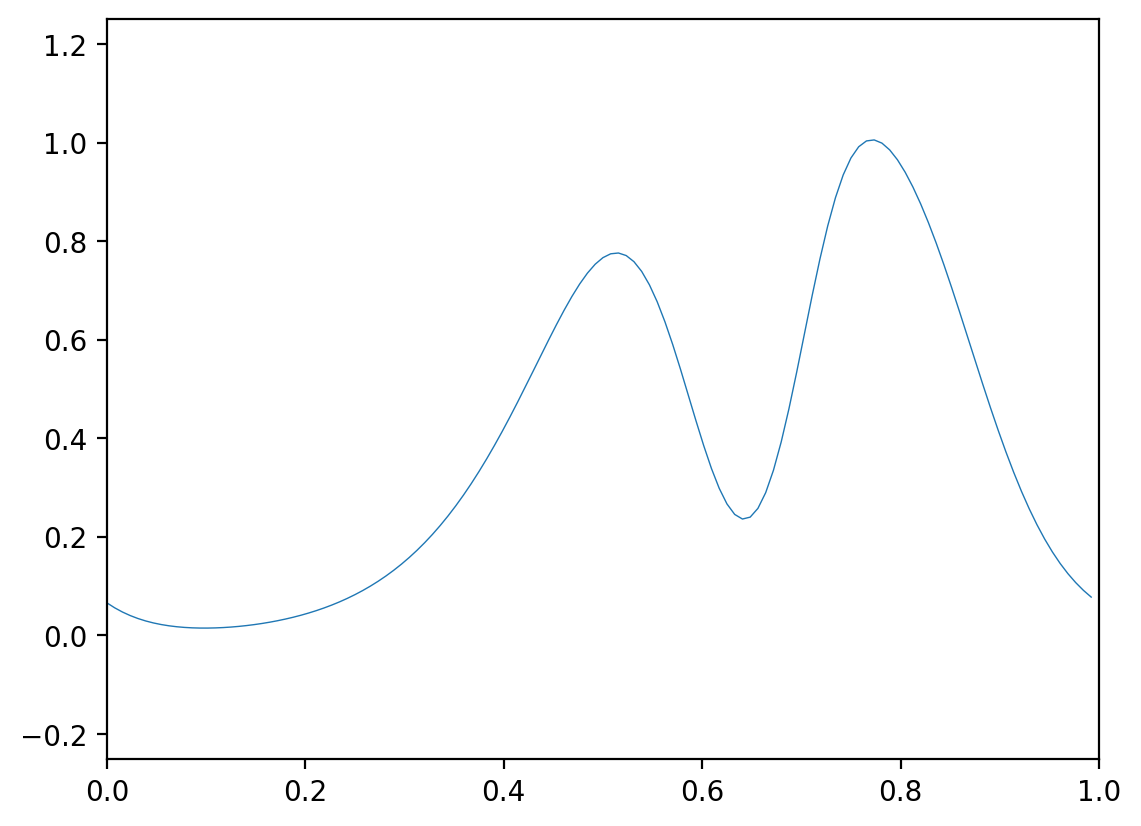

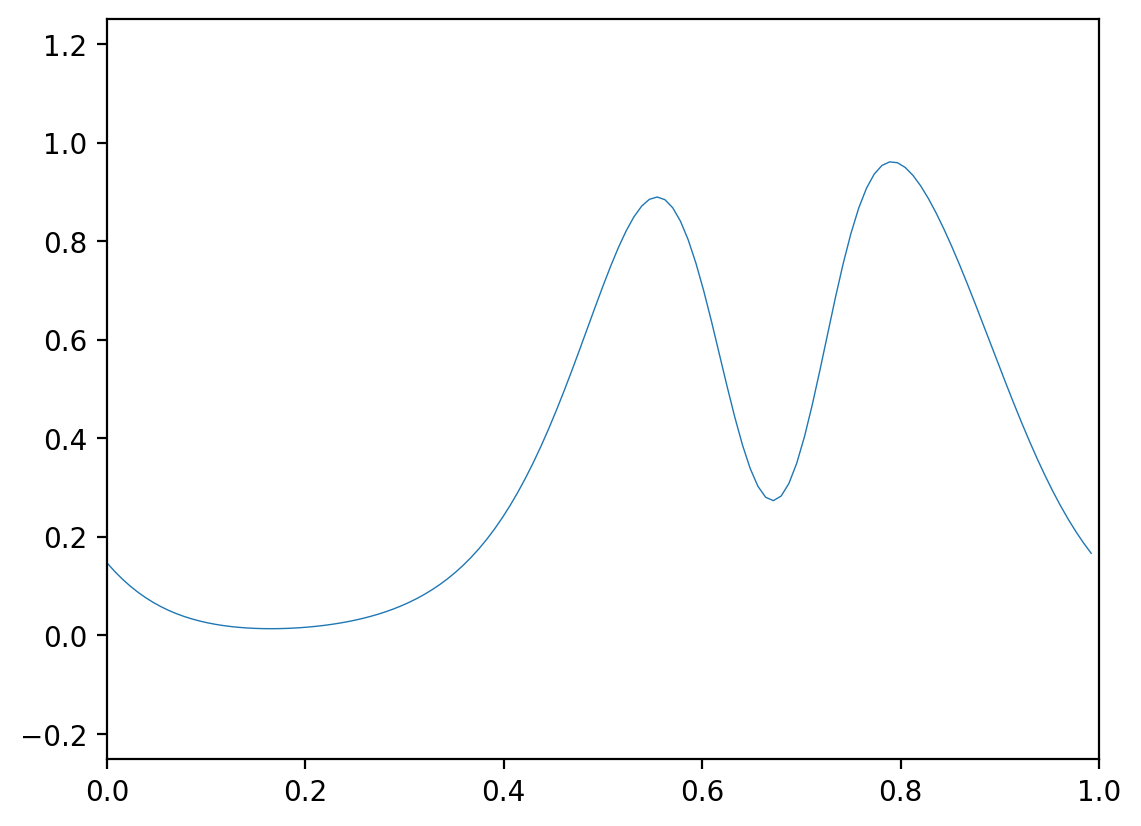

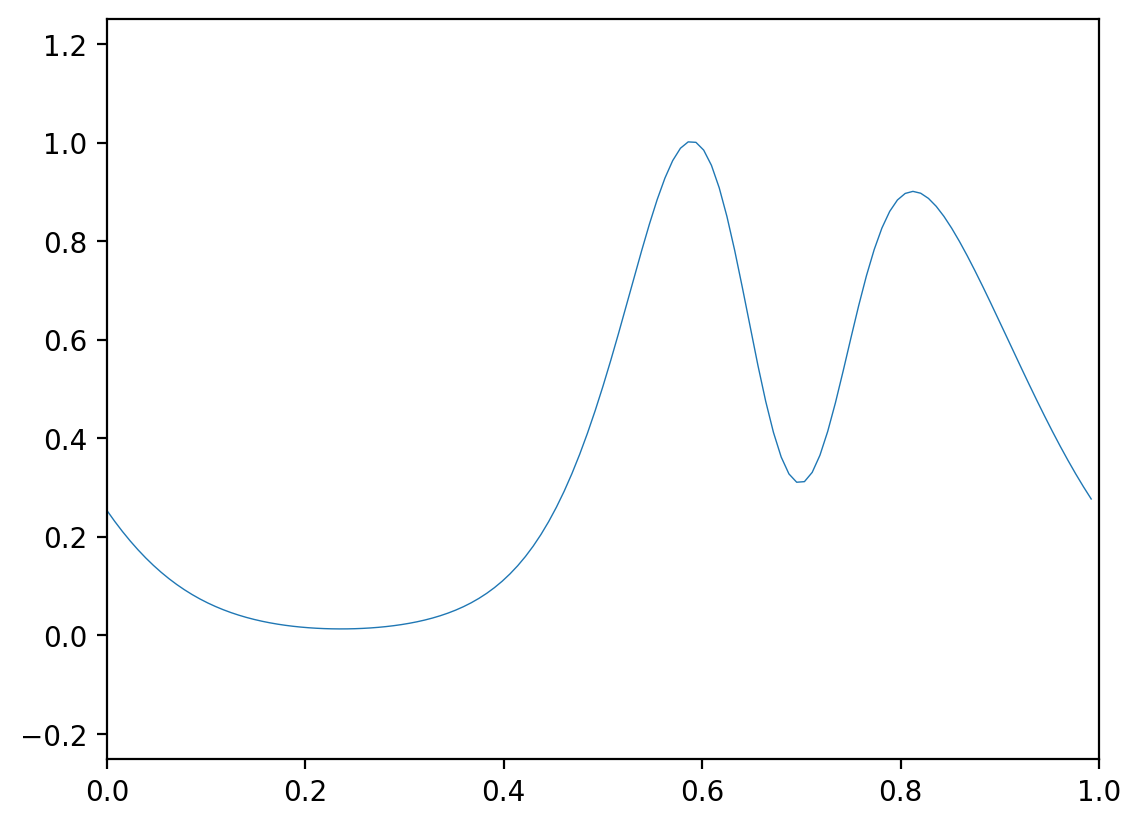

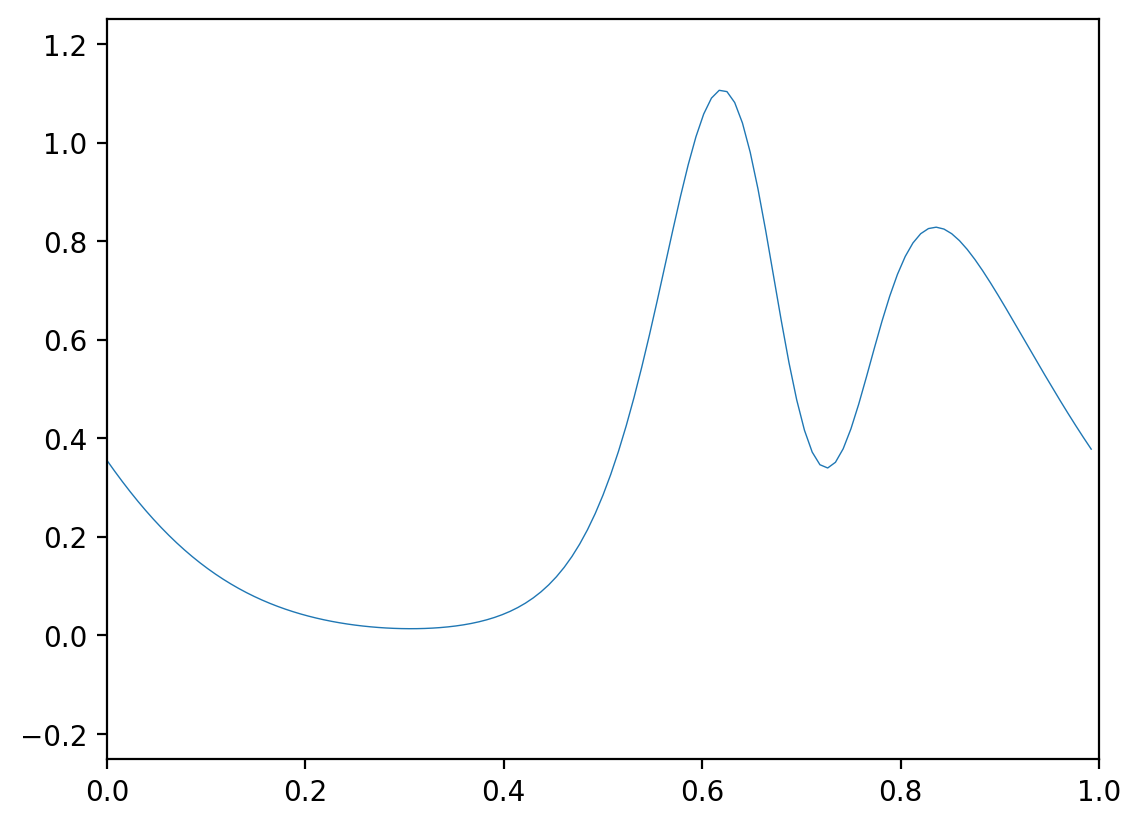

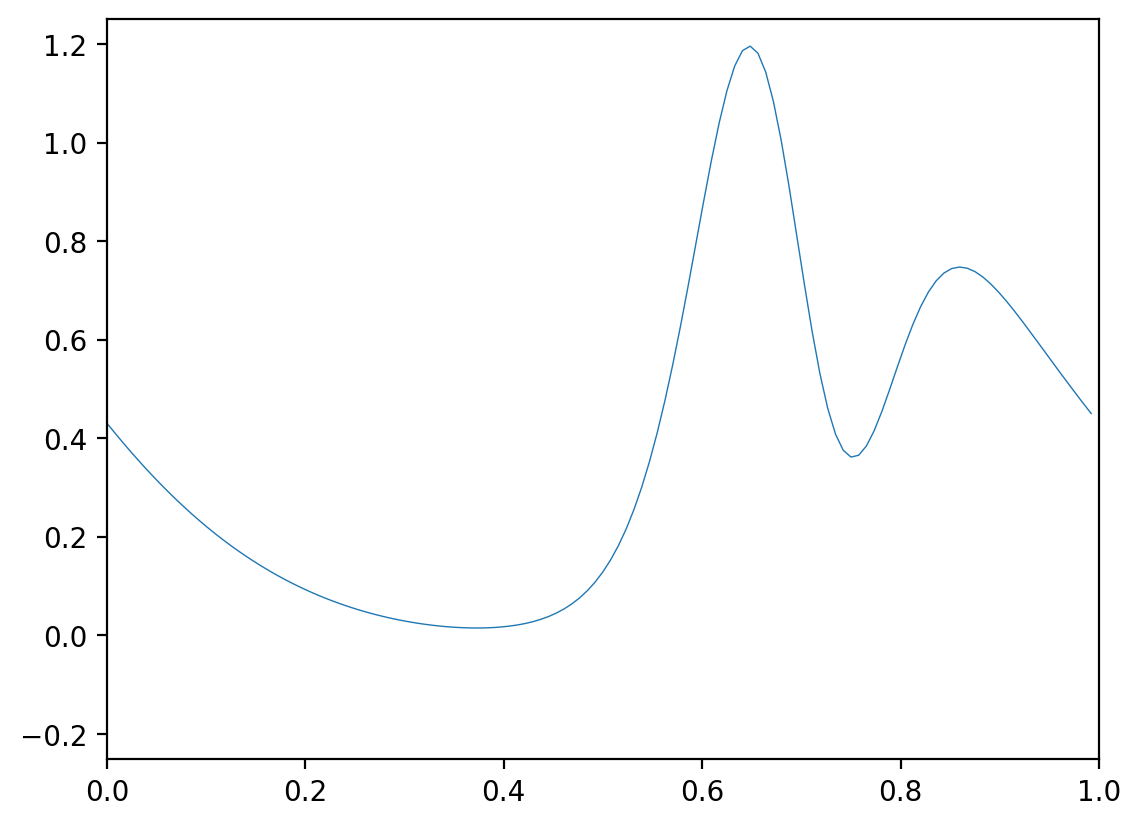

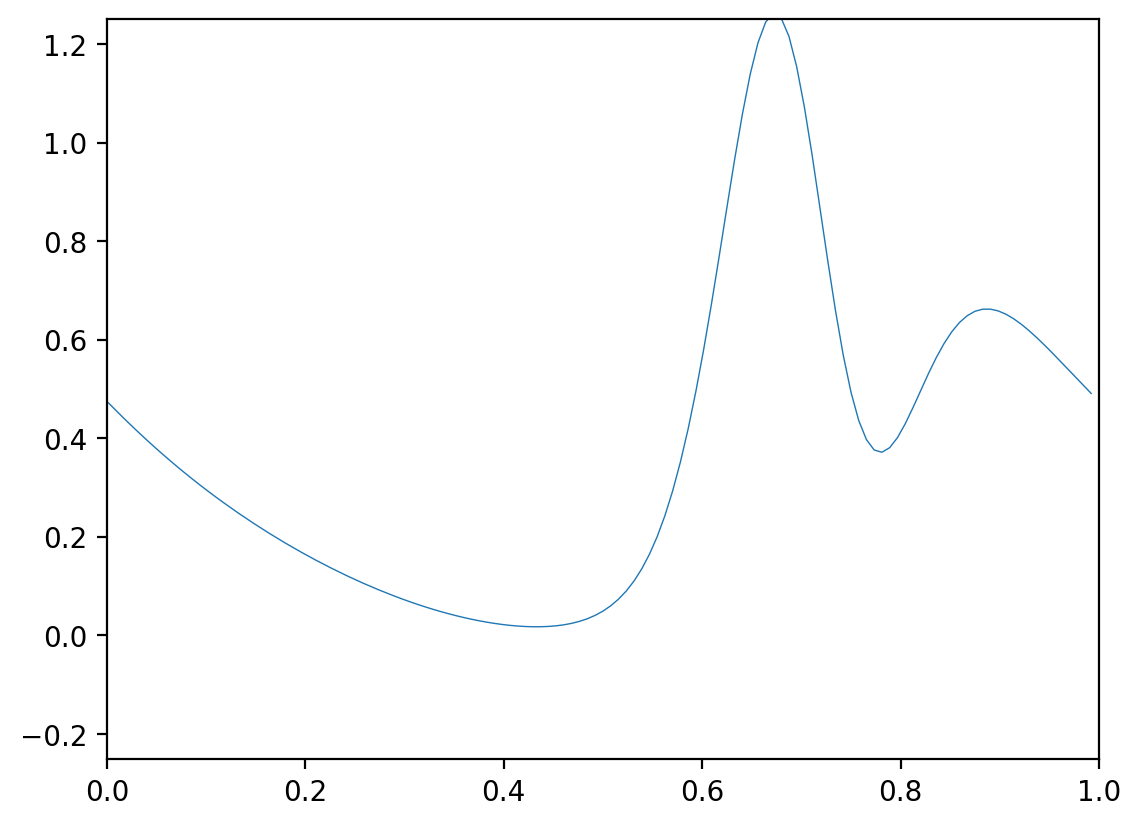

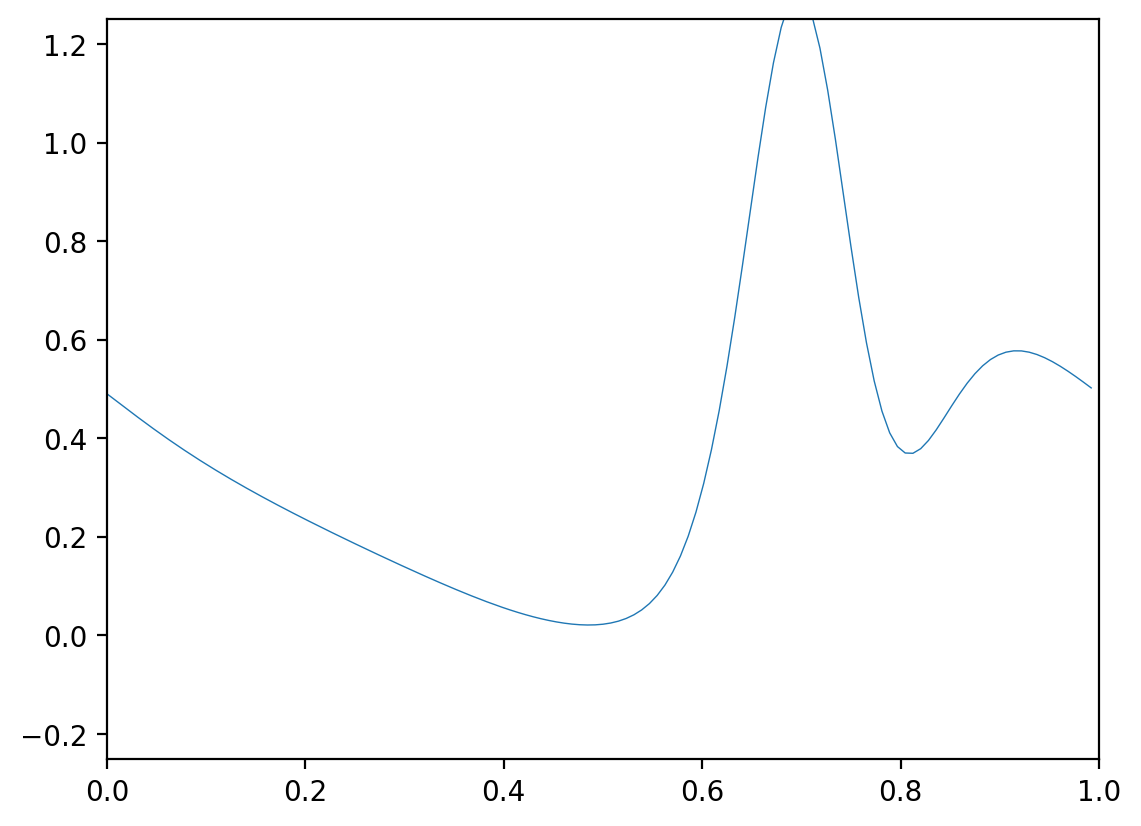

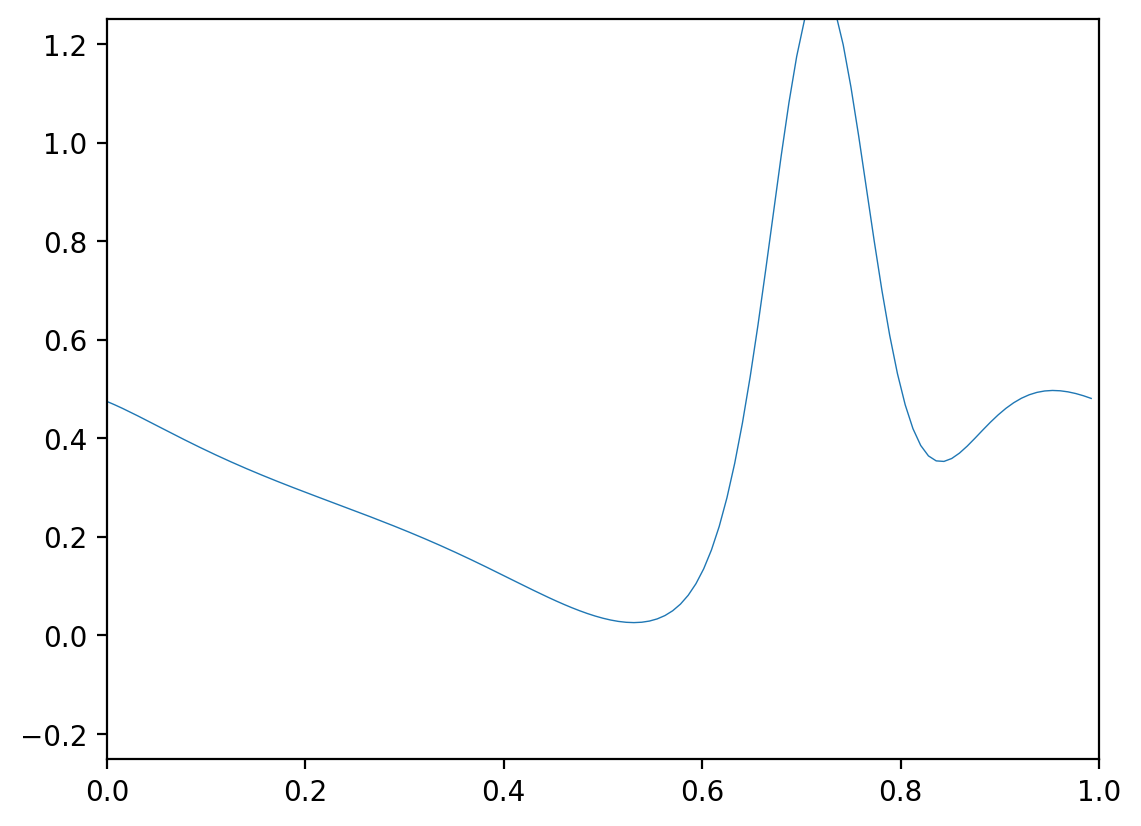

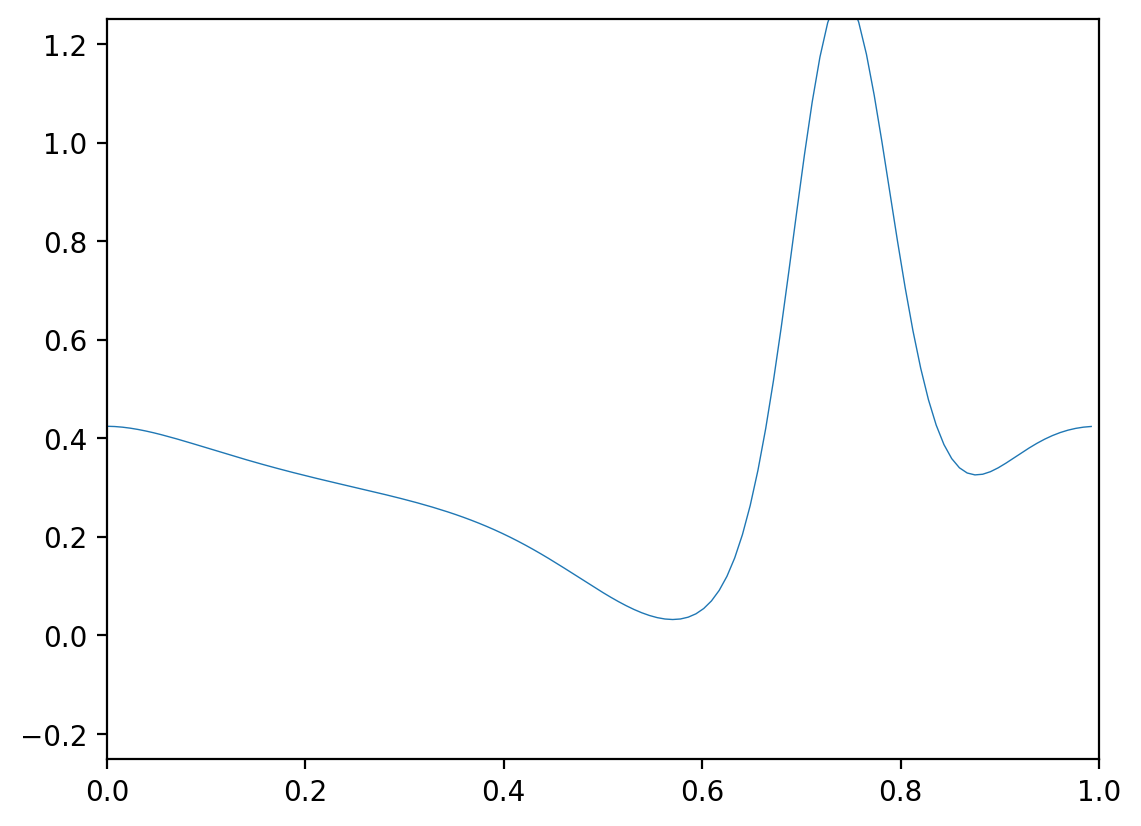

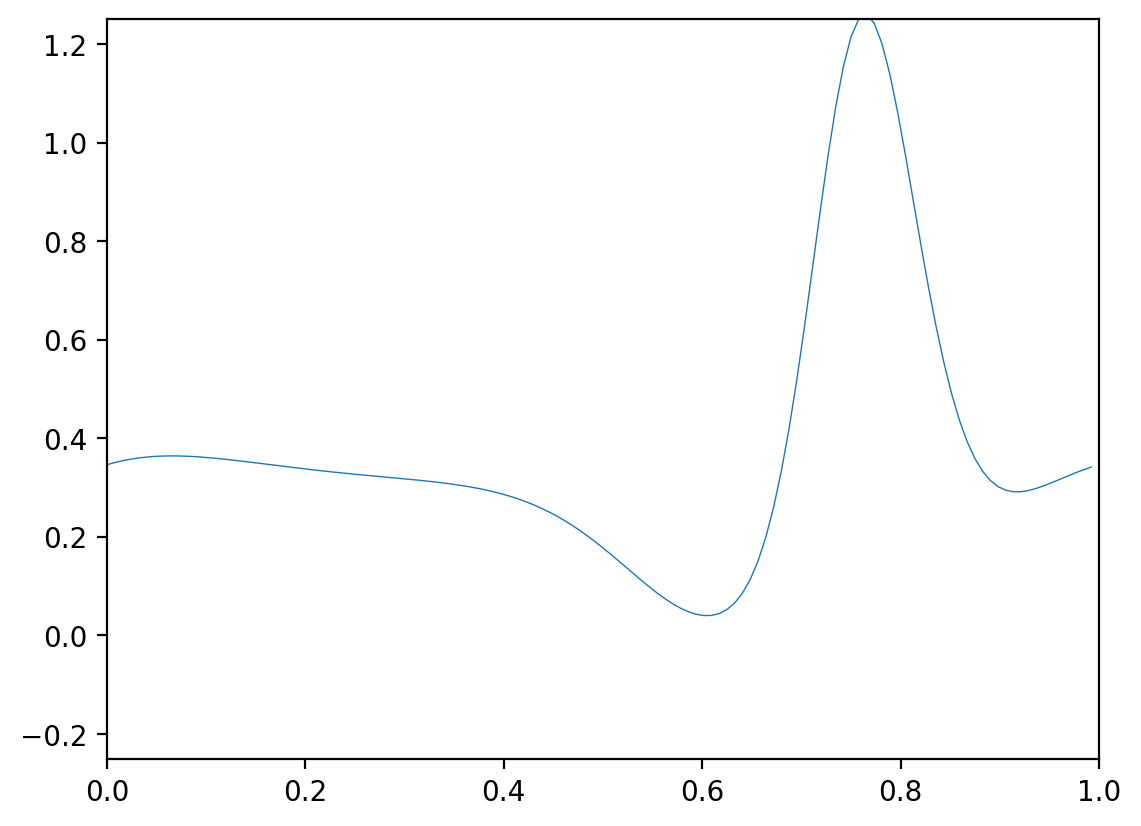

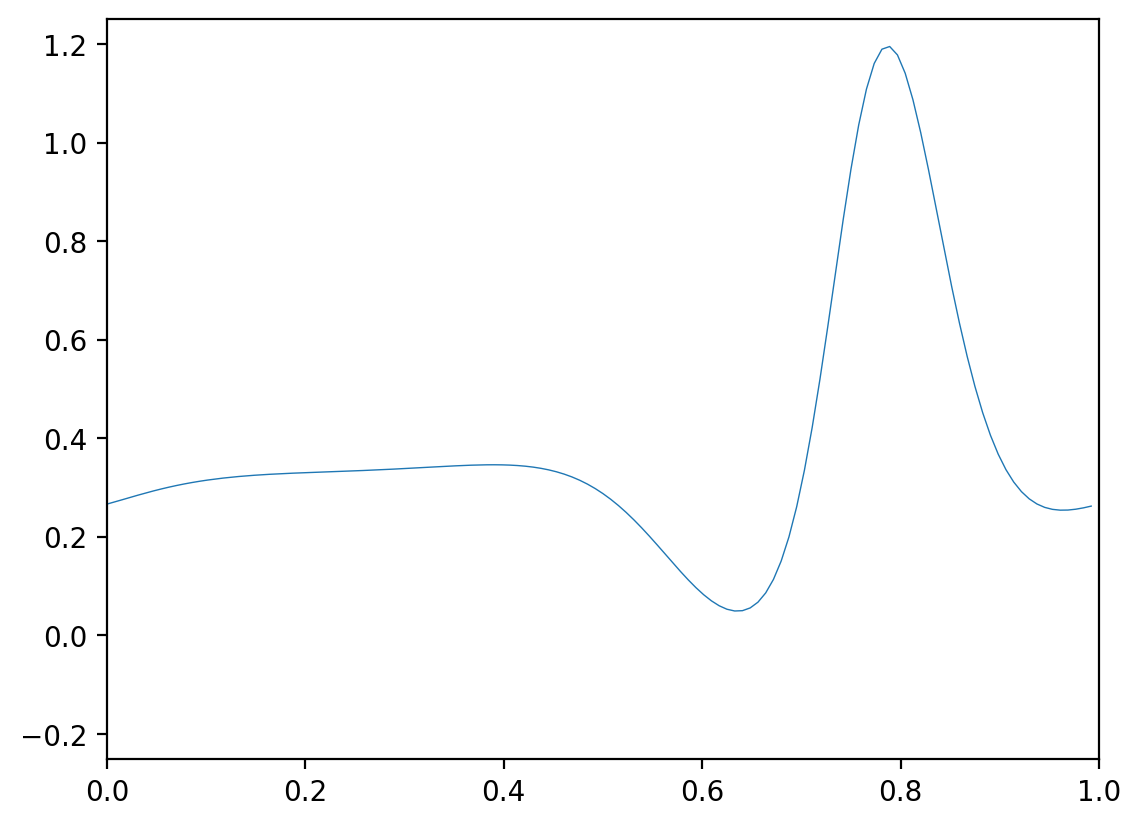

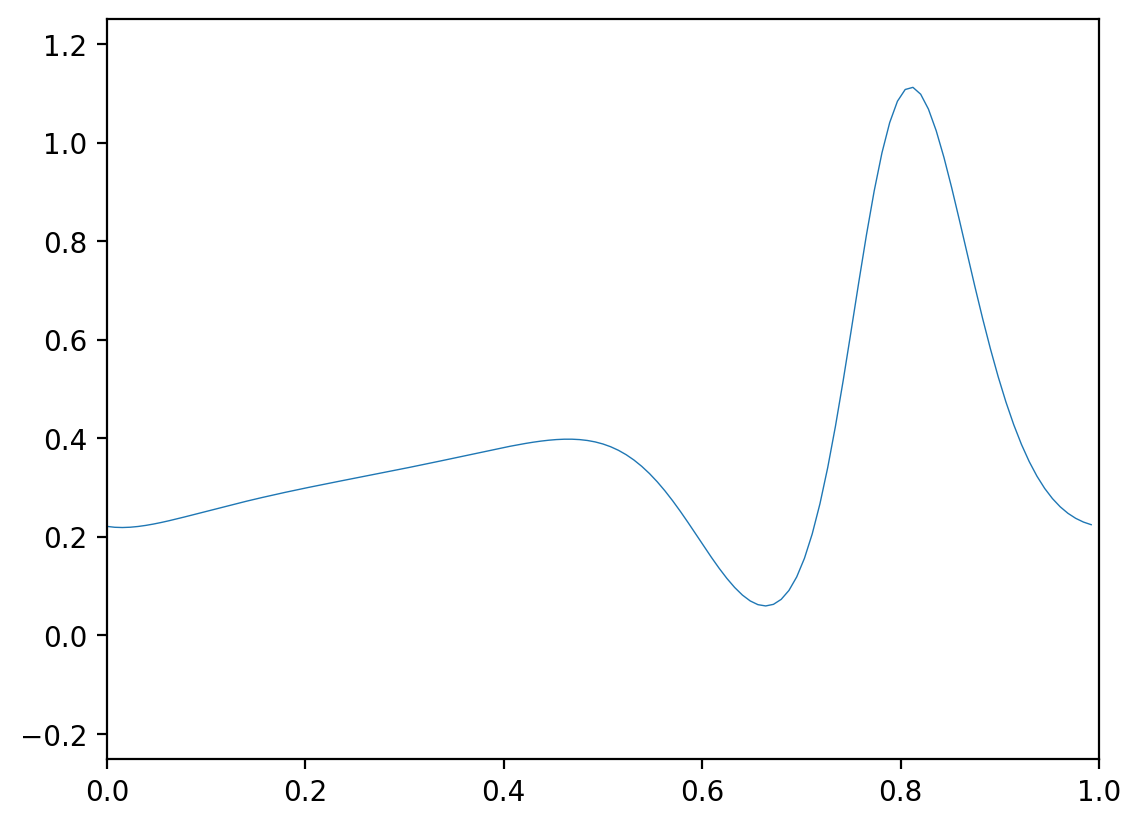

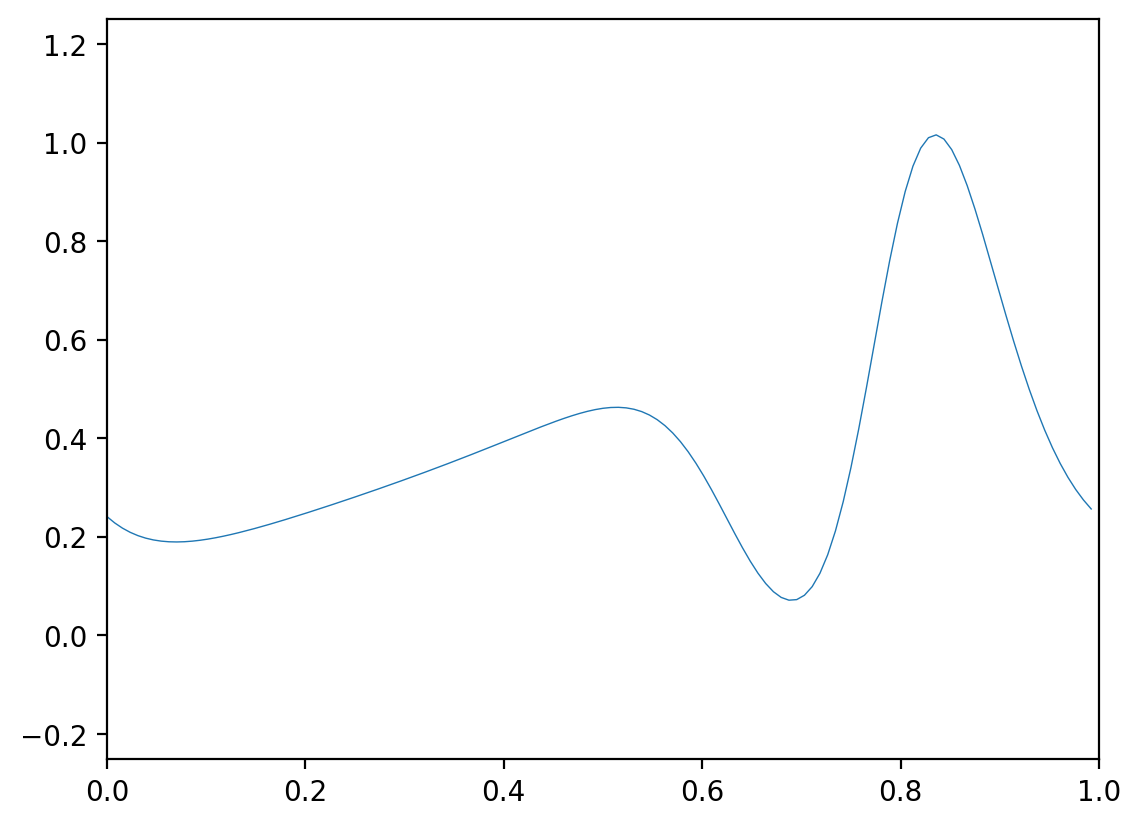

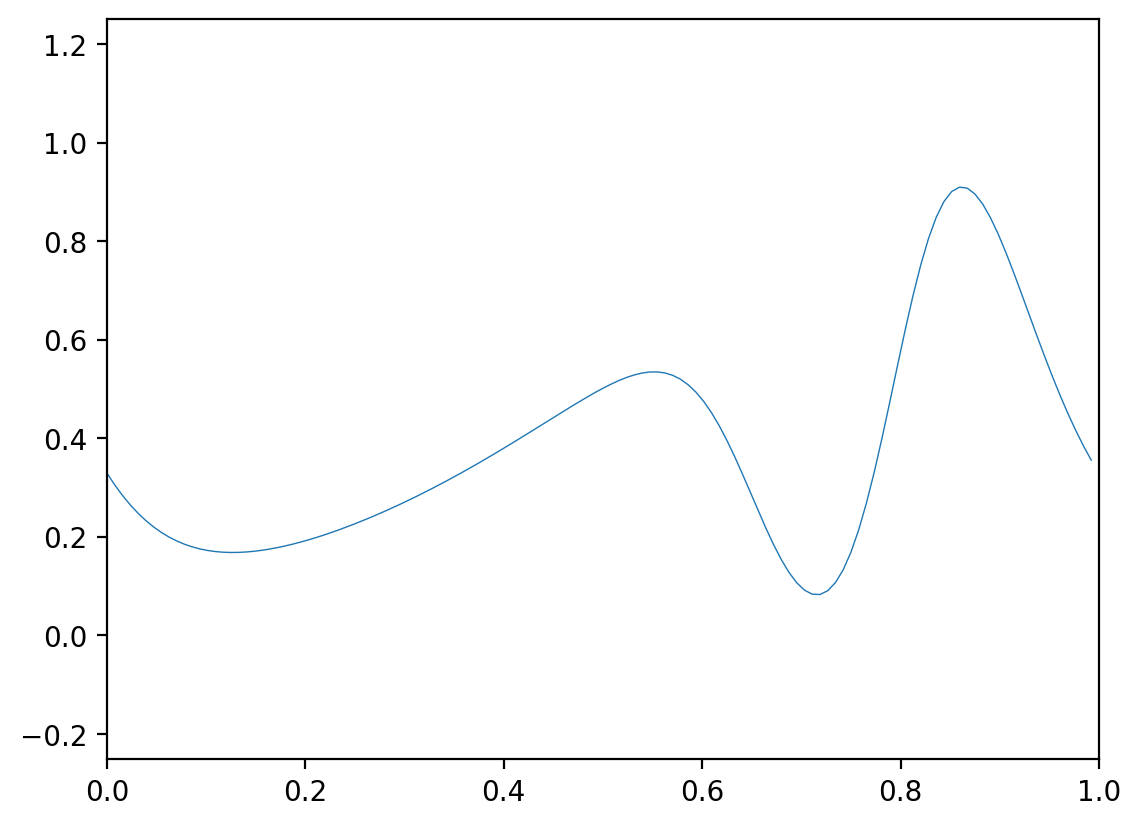

In [14]:
u = gaussian(x) + step(x)
u0 = u.copy()

fig, ax = plt.subplots()
ax.plot(x, u0, 'r-', linewidth=1)

for n in range(1, nt+1):

    ci = c(x[Jp1])  # at x = i + 1/2

    flux = ci * (u[J] + u[Jp1]) - np.abs(ci) * (u[Jp1] - u[J])
    flux /= 2
    u[J] = u[J] - (ht / hx) * (flux[J] - flux[Jm1])

    if n % 10 == 0:
        fig, ax = plt.subplots()
        ax.plot(x, u, '-', linewidth=0.5)
        ax.axis([0, 1, -0.25, 1.25])

plt.show(block=True)